In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Required Libraries**

In [ ]:
# ──────────────────────────────────────────────
# Core Libraries
# ──────────────────────────────────────────────
import numpy as np
import pandas as pd
import requests
import warnings
import pickle

# ──────────────────────────────────────────────
# Visualization
# ──────────────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import folium

# ──────────────────────────────────────────────
# Models – Traditional ML
# ──────────────────────────────────────────────
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# ──────────────────────────────────────────────
# Models – Gradient Boosting
# ──────────────────────────────────────────────
from xgboost import XGBClassifier
import xgboost as xgb

# ──────────────────────────────────────────────
# Model Evaluation / Metrics
# ──────────────────────────────────────────────
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    average_precision_score
)

# ──────────────────────────────────────────────
# Preprocessing
# ──────────────────────────────────────────────
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ──────────────────────────────────────────────
# Train-test, CV, and Search
# ──────────────────────────────────────────────
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    StratifiedKFold,
    cross_validate,
    cross_val_predict
)
from scipy.stats import randint, uniform, entropy

# ──────────────────────────────────────────────
# Imbalanced Data Handling
# ──────────────────────────────────────────────
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ──────────────────────────────────────────────
# Other Utilities
# ──────────────────────────────────────────────
from tqdm import tqdm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/drought_flood_prediction/final.csv')
df

AvgTemp  mon  YEAR  DISTRICT           STATE  PotentialEvapTran  \
0       22.669  Jan  1972  ANATAPUR  ANDHRA PRADESH               6.09   
1       25.081  Feb  1972  ANATAPUR  ANDHRA PRADESH               6.84   
2       27.498  Mar  1972  ANATAPUR  ANDHRA PRADESH               7.62   
3       30.161  Apr  1972  ANATAPUR  ANDHRA PRADESH               7.97   
4       29.437  May  1972  ANATAPUR  ANDHRA PRADESH               7.85   
...        ...  ...   ...       ...             ...                ...   
29983   24.965  Aug  2022  PARBHANI     MAHARASHTRA               5.42   
29984   25.917  Sep  2022  PARBHANI     MAHARASHTRA               6.11   
29985   26.912  Oct  2022  PARBHANI     MAHARASHTRA               6.62   
29986   23.664  Nov  2022  PARBHANI     MAHARASHTRA               6.26   
29987   22.715  Dec  2022  PARBHANI     MAHARASHTRA               5.89   

       Precipitation   SPI  VapourPres  WetDayFreq  CLASS  
0              0.000 -1.35      15.098       0.000      0  
1              2.096 -1.12      15.195       0.681      0  
2              1.482 -0.27      15.542       0.754      0  
3              5.901  0.18      19.614       1.201      0  
4            131.744 -0.28      21.053       5.813      0  
...              ...   ...         ...         ...    ...  
29983        206.450 -0.28      24.204       9.360      0  
29984        134.435 -0.54      23.960       6.664      0  
29985         55.296 -0.65      16.737       2.700      0  
29986          3.397 -0.74      13.114       1.072      0  
29987          0.000 -1.29      11.702       0.000      0  

[29988 rows x 11 columns]

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

AvgTemp          YEAR  PotentialEvapTran  Precipitation  \
count  29988.000000  29988.000000       29988.000000   29988.000000   
mean      25.228780   1997.000000           6.233888      70.870254   
std        5.620215     14.719847           1.511159     108.784528   
min        1.168000   1972.000000           0.290000       0.000000   
25%       23.000750   1984.000000           5.590000       0.659000   
50%       26.003000   1997.000000           6.040000      18.418500   
75%       28.762000   2010.000000           7.180000     104.608000   
max       35.853000   2022.000000          10.220000    1514.729000   

                SPI    VapourPres    WetDayFreq         CLASS  
count  29988.000000  29988.000000  29988.000000  29988.000000  
mean      -0.003457     19.340637      3.649542      0.070662  
std        0.999944      6.812178      4.326610      0.256263  
min       -3.760000      0.801000      0.000000      0.000000  
25%       -0.670000     13.904750      0.446000      0.000000  
50%        0.020000     18.835000      1.631500      0.000000  
75%        0.700000     24.342000      6.031000      0.000000  
max        3.440000     36.882000     30.772000      1.000000

In [ ]:
df['mon'].value_counts()

mon
Jan    2499
Feb    2499
Mar    2499
Apr    2499
May    2499
Jun    2499
Jul    2499
Aug    2499
Sep    2499
Oct    2499
Nov    2499
Dec    2499
Name: count, dtype: int64

In [ ]:
df['YEAR'].value_counts()

YEAR
1972    588
2010    588
2000    588
2001    588
2002    588
2003    588
2004    588
2005    588
2006    588
2007    588
2008    588
2009    588
2011    588
1998    588
2012    588
2013    588
2014    588
2015    588
2016    588
2017    588
2018    588
2019    588
2020    588
2021    588
1999    588
1997    588
1973    588
1984    588
1974    588
1975    588
1976    588
1977    588
1978    588
1979    588
1980    588
1981    588
1982    588
1983    588
1985    588
1996    588
1986    588
1987    588
1988    588
1989    588
1990    588
1991    588
1992    588
1993    588
1994    588
1995    588
2022    588
Name: count, dtype: int64

In [ ]:
df['STATE'].value_counts()

STATE
MAHARASHTRA       7344
GUJARAT           6732
BIHAR             6120
ANDHRA PRADESH    4896
KARNATAKA         4896
Name: count, dtype: int64

In [ ]:
df['CLASS'].value_counts()

CLASS
0    27869
1     2119
Name: count, dtype: int64

In [ ]:
df[df['CLASS']==1]['STATE'].value_counts()/df['STATE'].value_counts()*100

STATE
ANDHRA PRADESH    7.026144
BIHAR             6.650327
GUJARAT           6.461676
KARNATAKA         7.352941
MAHARASHTRA       7.802288
Name: count, dtype: float64

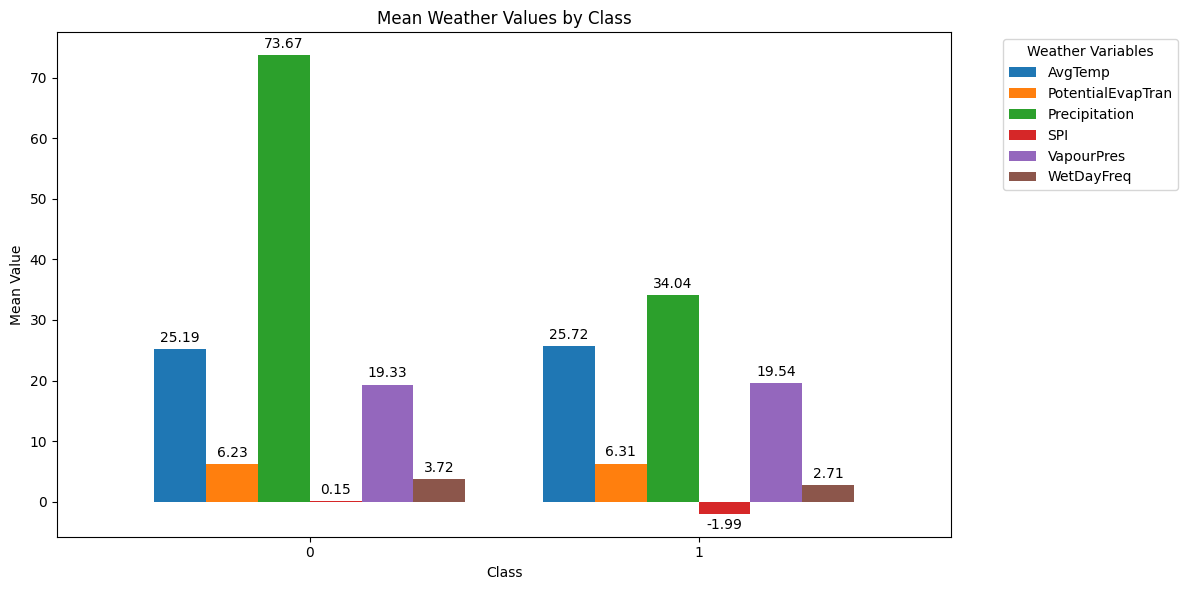

In [ ]:
weather_columns = ['AvgTemp', 'PotentialEvapTran', 'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq']
class_means = df.groupby('CLASS')[weather_columns].mean()
ax = class_means.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Mean Weather Values by Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.legend(title='Weather Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()

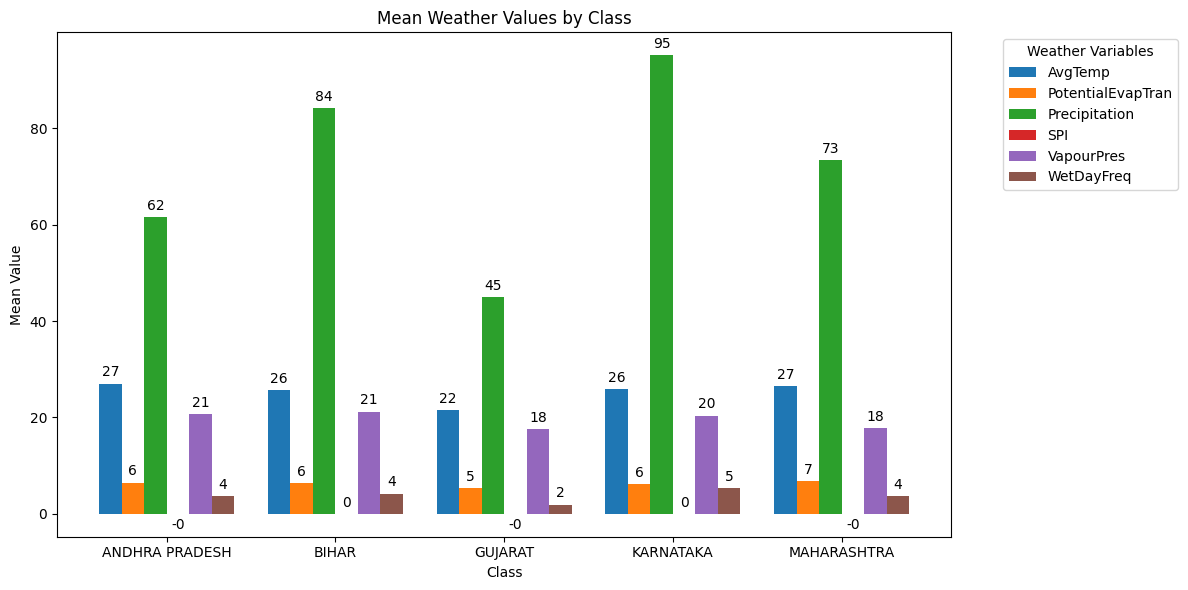

In [ ]:
weather_columns = ['AvgTemp', 'PotentialEvapTran', 'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq']
class_means = df.groupby('STATE')[weather_columns].mean()
ax = class_means.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Mean Weather Values by Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.legend(title='Weather Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('STATE')['DISTRICT'].nunique()

STATE
ANDHRA PRADESH     8
BIHAR             10
GUJARAT           11
KARNATAKA          8
MAHARASHTRA       12
Name: DISTRICT, dtype: int64

In [ ]:

states = df['STATE'].unique()
def plot_timeseries(attr, states,attrnm):
  fig = plt.figure(figsize=(18, 12))
  gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
  for i, state in enumerate(states[:4]):
      ax = fig.add_subplot(gs[i // 2, i % 2])
      state_data = df[df['STATE'] == state]
      districts = state_data['DISTRICT'].unique()
      for district in districts:
          district_data = state_data[state_data['DISTRICT'] == district]
          attr_by_year = district_data.groupby('YEAR')[attr].mean()
          years = attr_by_year.index
          attr_2yr = attr_by_year.rolling(window=2, center=True).mean()
          ax.plot(years, attr_2yr, label=district)
      ax.set_title(state)
      ax.set_xlabel('Year')
      ax.set_ylabel(attrnm)
      ax.grid()
      ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
  ax = fig.add_subplot(gs[2, 0])
  state_data = df[df['STATE'] == states[4]]
  districts = state_data['DISTRICT'].unique()
  for district in districts:
      district_data = state_data[state_data['DISTRICT'] == district]
      attr_by_year = district_data.groupby('YEAR')[attr].mean()
      years = attr_by_year.index
      attr_2yr = attr_by_year.rolling(window=2, center=True).mean()
      ax.plot(years, attr_2yr, label=district)
  ax.set_title(states[4])
  ax.set_xlabel('Year')
  ax.set_ylabel(attrnm)
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
  ax.grid()
  plt.suptitle(f"Time Series of {attrnm} in Different States and their Districts",fontsize=16)
  plt.tight_layout()
  plt.savefig(f"{attrnm} Time series.png",dpi=300)
  plt.show()

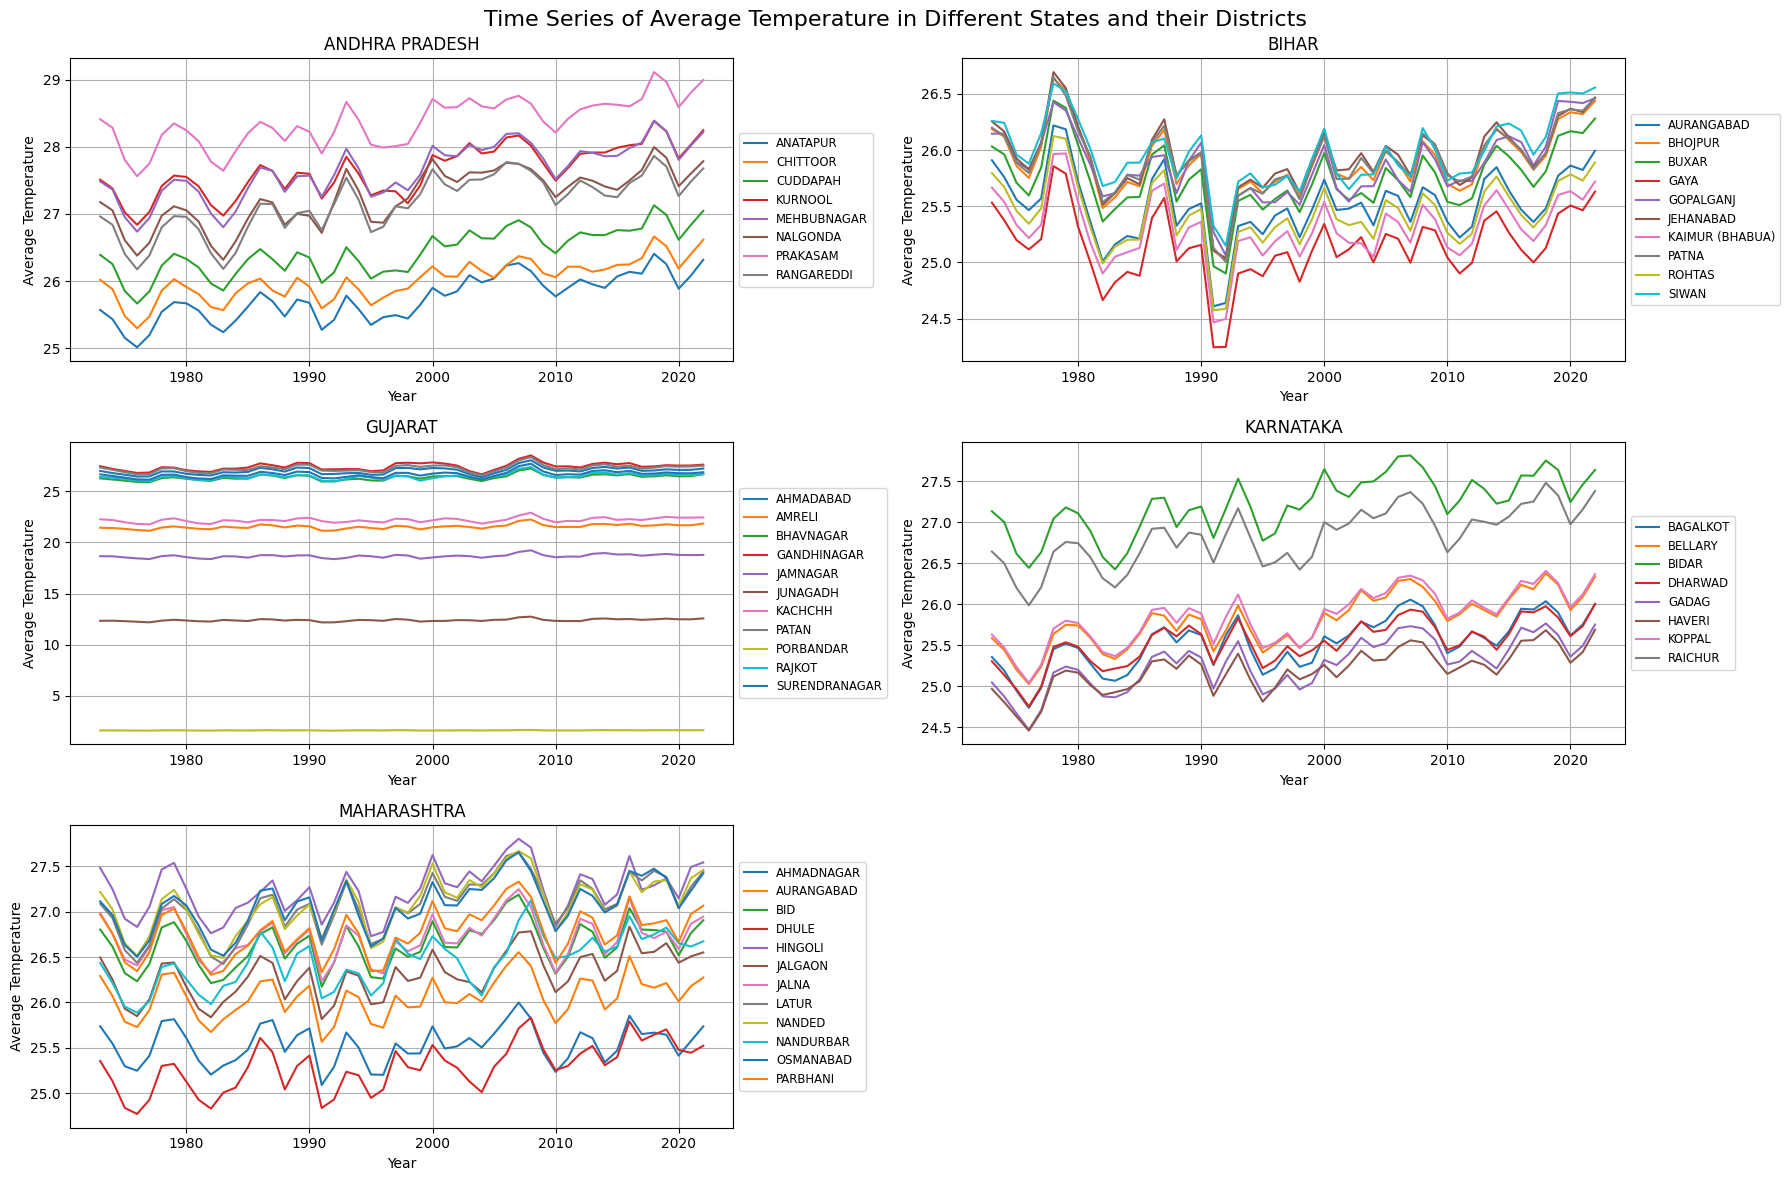

In [ ]:
plot_timeseries('AvgTemp',states,'Average Temperature')

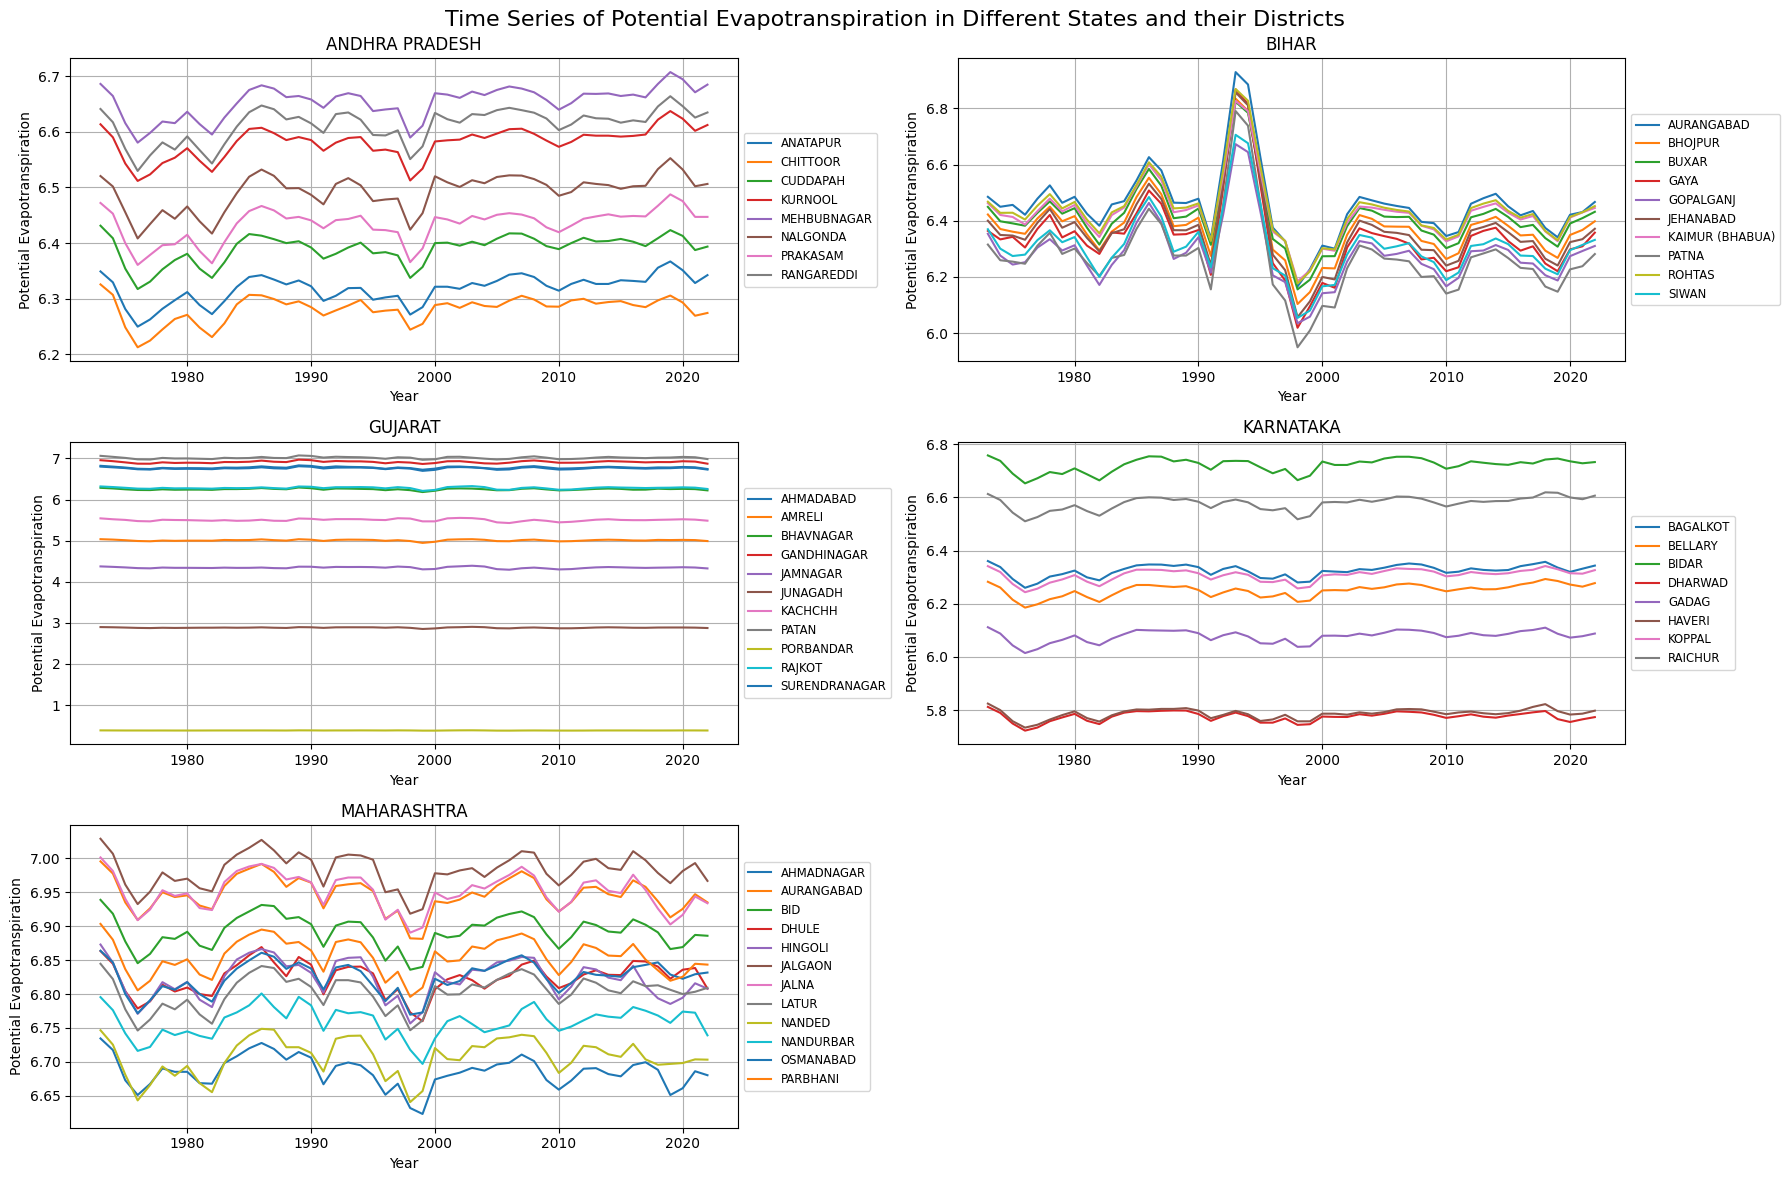

In [ ]:
plot_timeseries('PotentialEvapTran',states,'Potential Evapotranspiration')

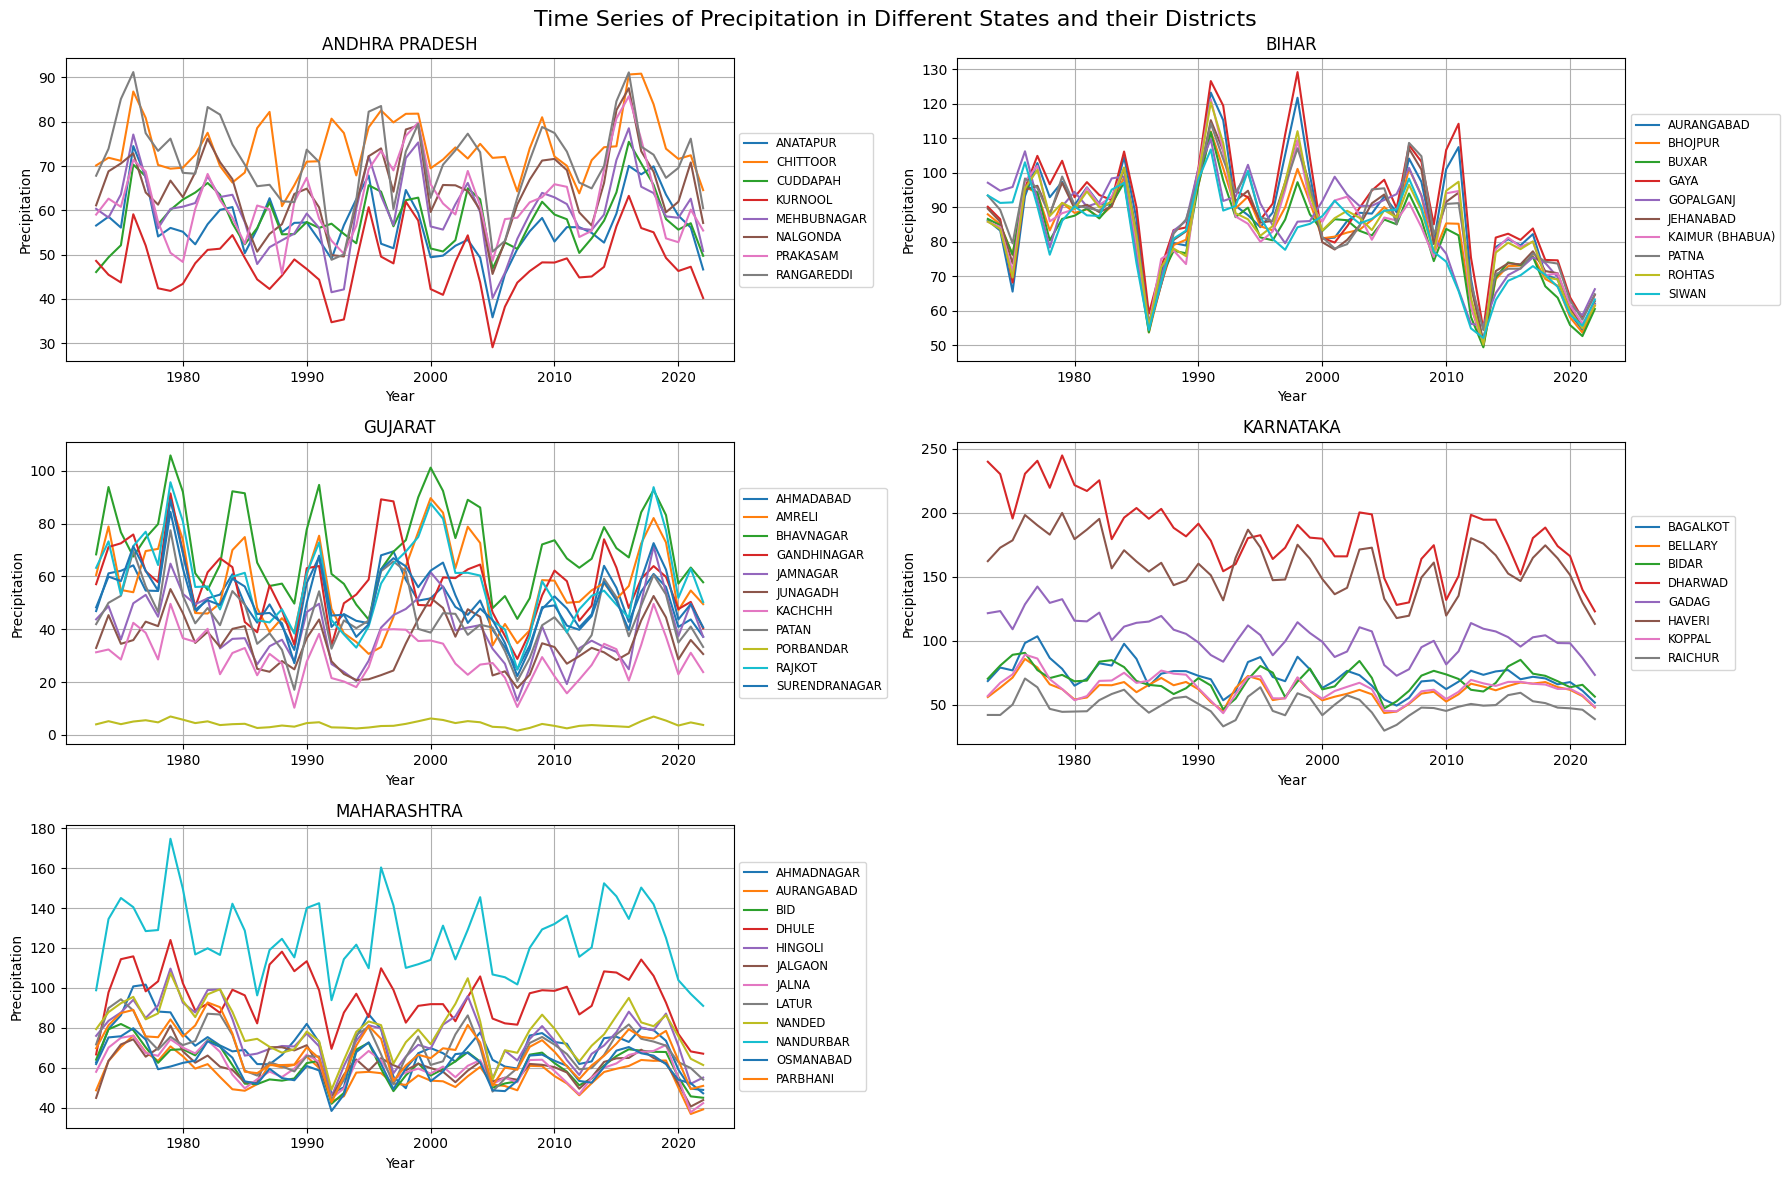

In [ ]:
plot_timeseries('Precipitation',states,'Precipitation')

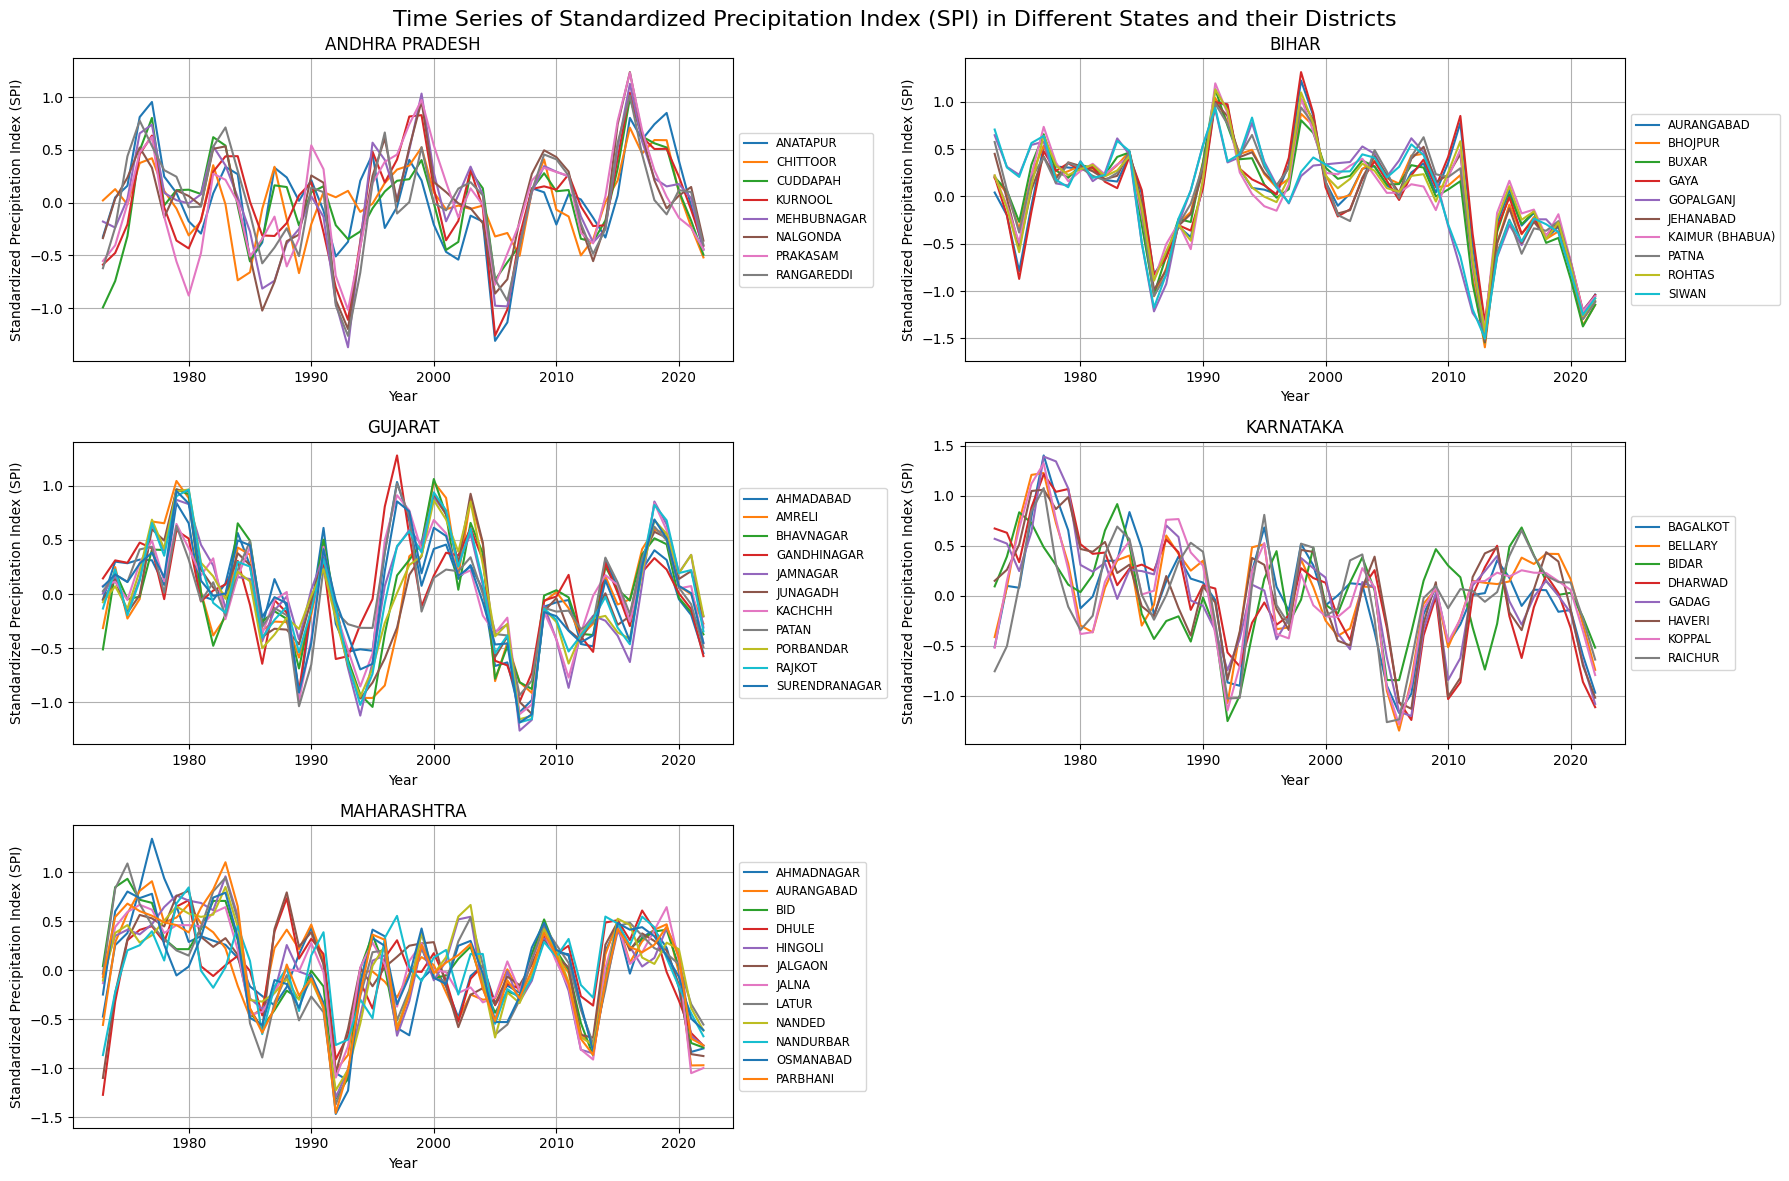

In [ ]:
plot_timeseries('SPI',states,'Standardized Precipitation Index (SPI)')

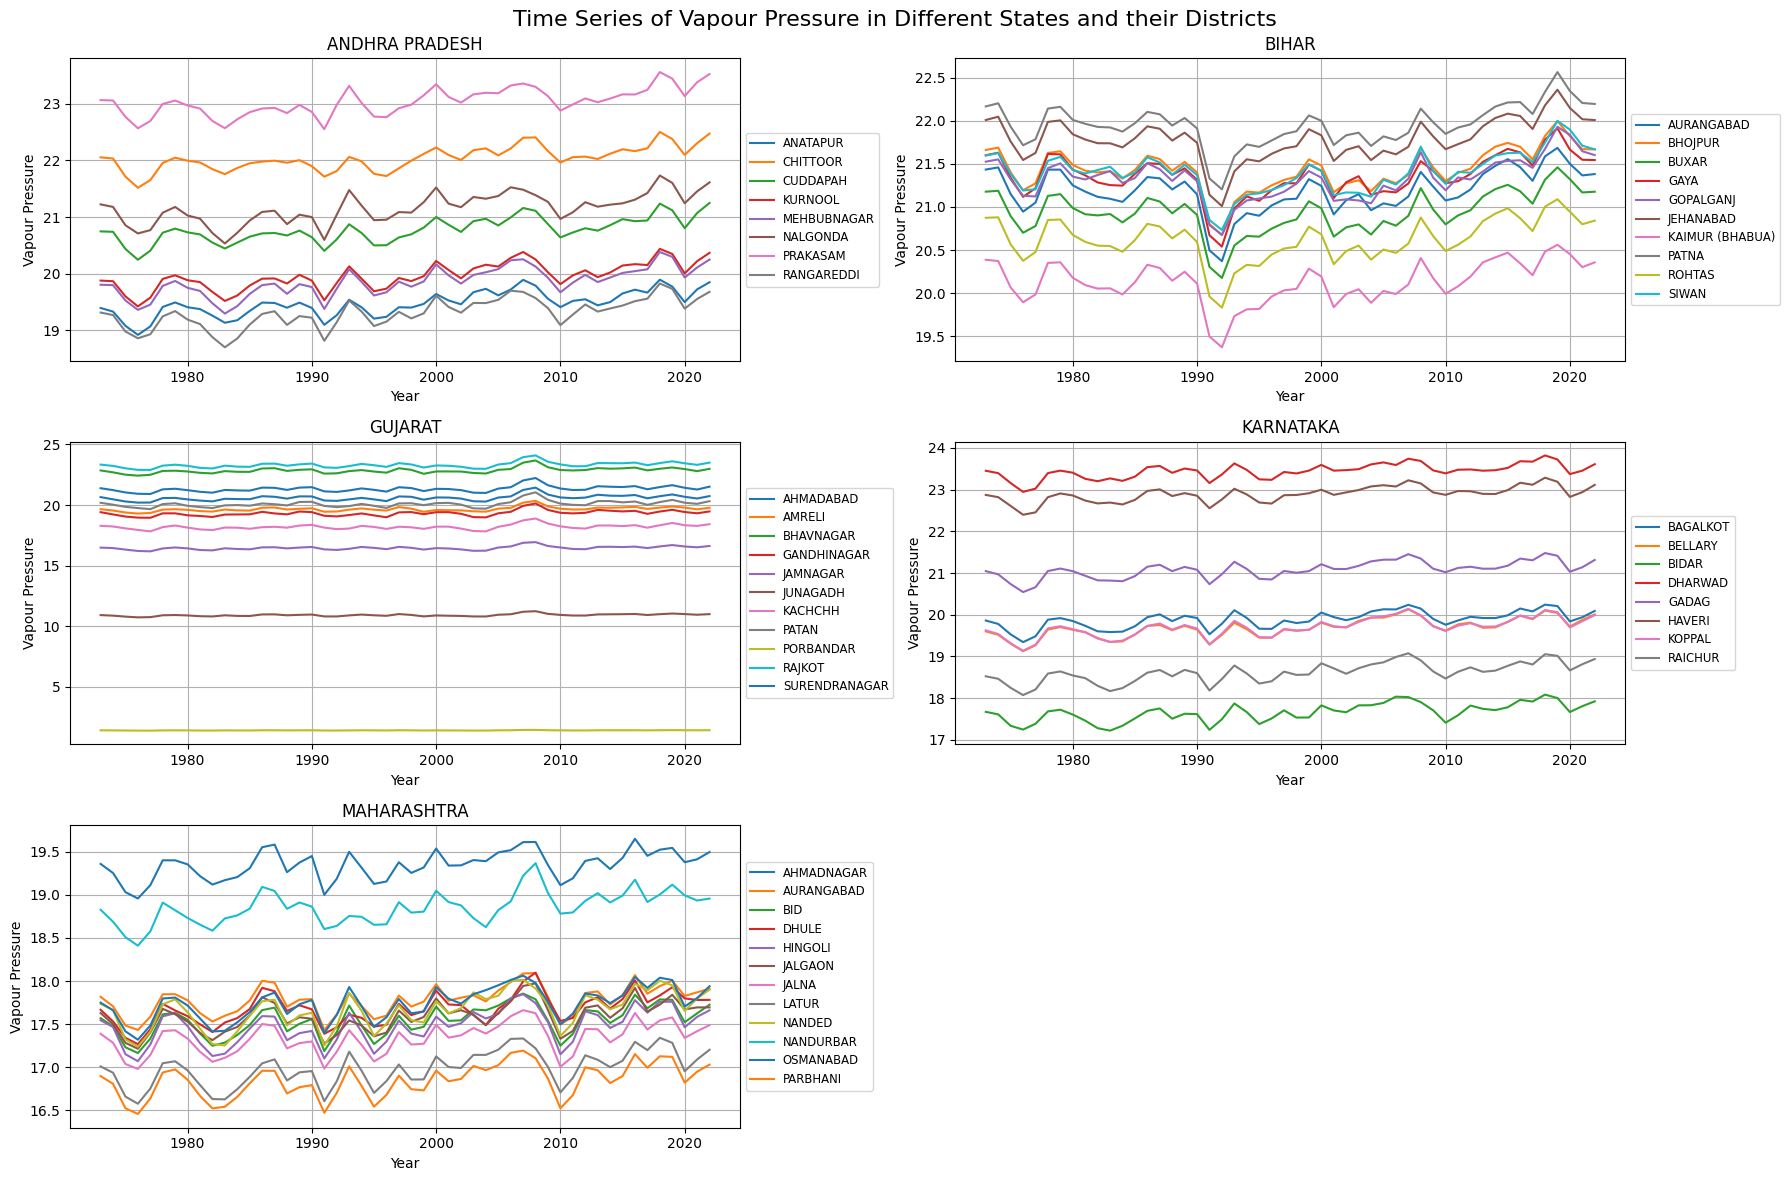

In [ ]:
plot_timeseries('VapourPres',states,'Vapour Pressure')

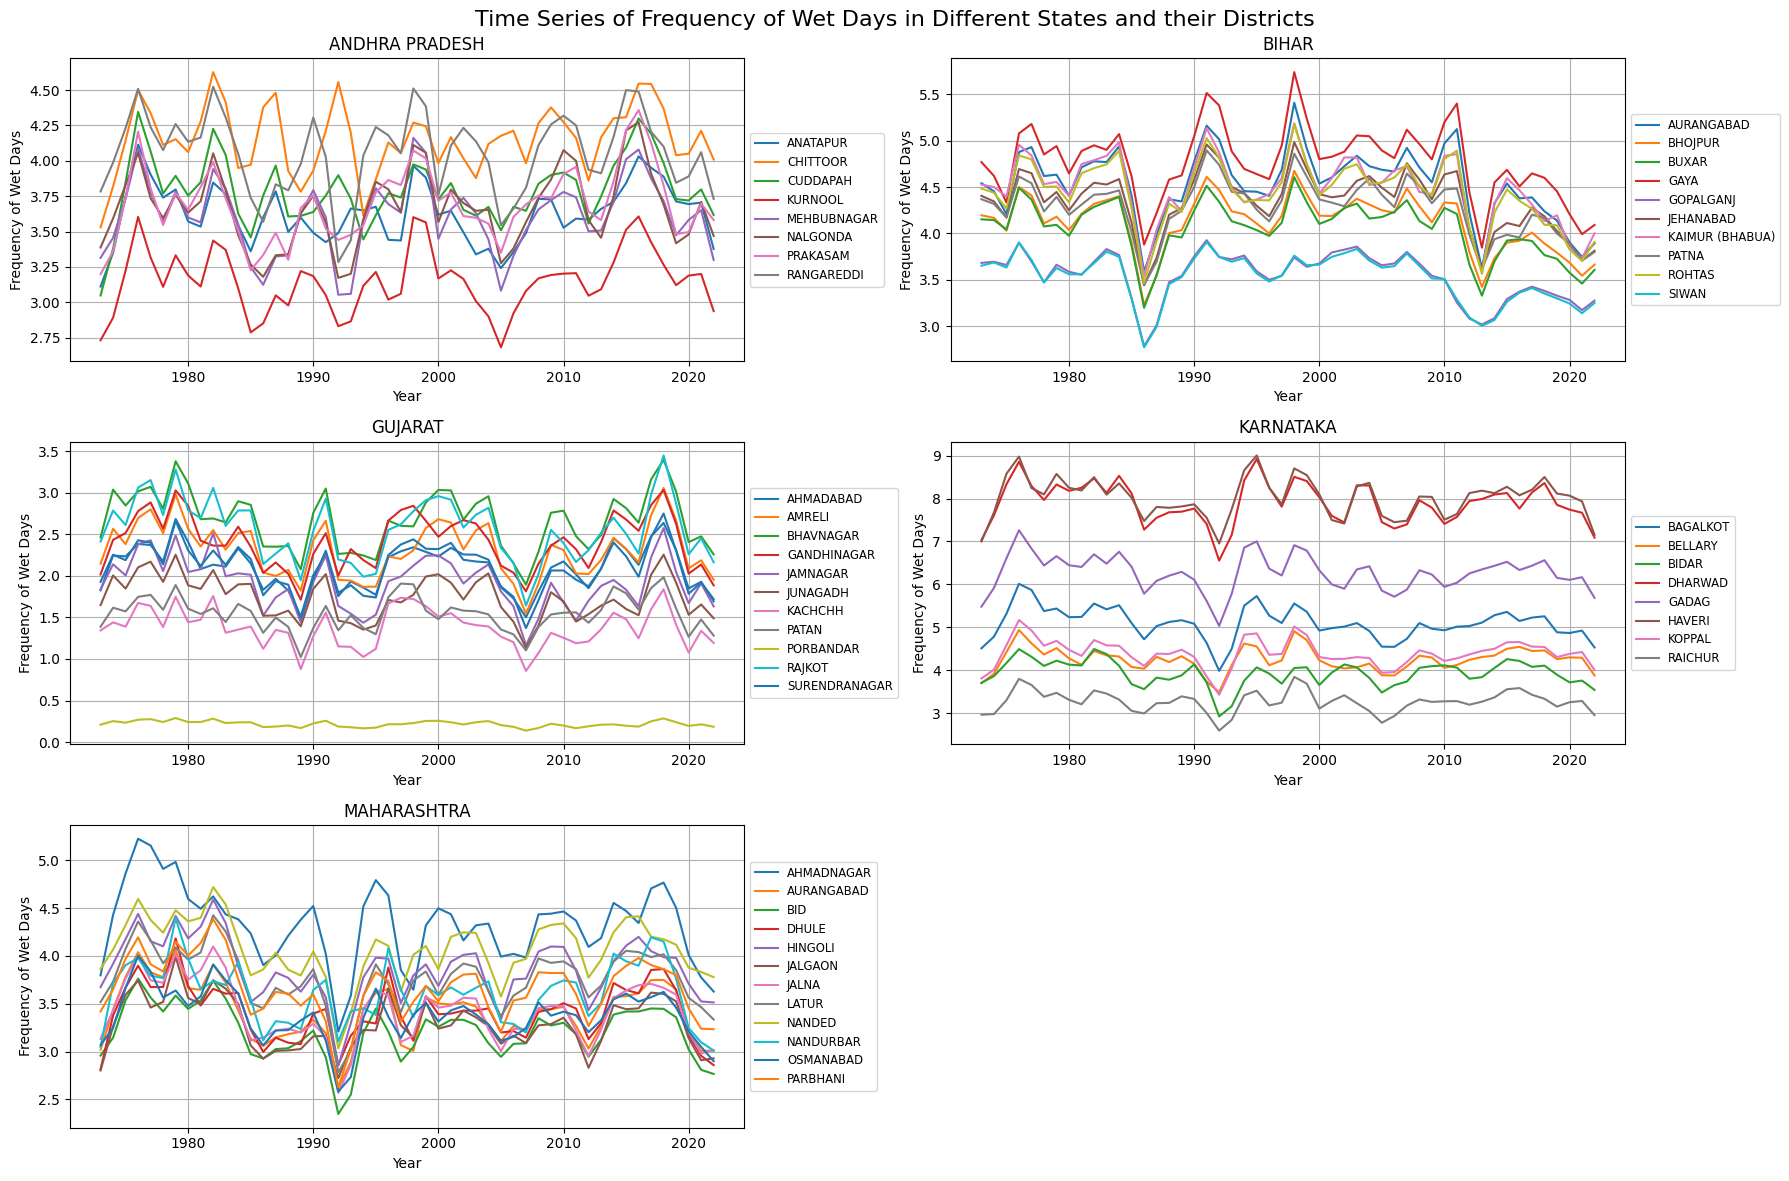

In [ ]:
plot_timeseries('WetDayFreq',states,'Frequency of Wet Days')

In [ ]:
df['DISTRICT'].value_counts()

DISTRICT
AURANGABAD         1224
ANATAPUR            612
RAICHUR             612
RAJKOT              612
SURENDRANAGAR       612
BAGALKOT            612
BELLARY             612
BIDAR               612
DHARWAD             612
GADAG               612
HAVERI              612
KOPPAL              612
AHMADNAGAR          612
PATAN               612
BID                 612
DHULE               612
HINGOLI             612
JALGAON             612
JALNA               612
LATUR               612
NANDED              612
NANDURBAR           612
OSMANABAD           612
PORBANDAR           612
KACHCHH             612
CHITTOOR            612
GOPALGANJ           612
CUDDAPAH            612
KURNOOL             612
MEHBUBNAGAR         612
NALGONDA            612
PRAKASAM            612
RANGAREDDI          612
BHOJPUR             612
BUXAR               612
GAYA                612
JEHANABAD           612
JUNAGADH            612
KAIMUR (BHABUA)     612
PATNA               612
ROHTAS              612
SIWAN               612
AHMADABAD           612
AMRELI              612
BHAVNAGAR           612
GANDHINAGAR         612
JAMNAGAR            612
PARBHANI            612
Name: count, dtype: int64

In [ ]:
for idx,row in df.iterrows():
    if row['DISTRICT']=='AURANGABAD' and row['STATE']=='BIHAR':
        df.loc[idx,'DISTRICT'] = 'AURANGABAD1'
    elif row['DISTRICT']=='AURANGABAD' and row['STATE']=='MAHARASHTRA':
        df.loc[idx,'DISTRICT'] = 'AURANGABAD2'
df['DISTRICT'].value_counts()

DISTRICT
ANATAPUR           612
PATAN              612
RAJKOT             612
SURENDRANAGAR      612
BAGALKOT           612
BELLARY            612
BIDAR              612
DHARWAD            612
GADAG              612
HAVERI             612
KOPPAL             612
RAICHUR            612
AHMADNAGAR         612
AURANGABAD2        612
BID                612
DHULE              612
HINGOLI            612
JALGAON            612
JALNA              612
LATUR              612
NANDED             612
NANDURBAR          612
OSMANABAD          612
PORBANDAR          612
KACHCHH            612
CHITTOOR           612
JUNAGADH           612
CUDDAPAH           612
KURNOOL            612
MEHBUBNAGAR        612
NALGONDA           612
PRAKASAM           612
RANGAREDDI         612
AURANGABAD1        612
BHOJPUR            612
BUXAR              612
GAYA               612
GOPALGANJ          612
JEHANABAD          612
KAIMUR (BHABUA)    612
PATNA              612
ROHTAS             612
SIWAN              612
AHMADABAD          612
AMRELI             612
BHAVNAGAR          612
GANDHINAGAR        612
JAMNAGAR           612
PARBHANI           612
Name: count, dtype: int64

In [ ]:
dists = df['DISTRICT'].unique()
print("No. of Districts =",len(dists))

No. of Districts = 49


In [ ]:
dst = dict(zip(df['DISTRICT'],df['STATE']))
dst = dict([(key, value) for key, value in dst.items() if key not in dst or dst[key] == value])
def get_lat_long(district, state):
    API_KEY = "049f264a67544f9fb1a600db3b1f67f2"
    address = f"{district}, {state}, India"
    url = f"https://api.geoapify.com/v1/geocode/search?text={address}&limit=1&apiKey={API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        result = data["features"][0]
        lat = result["geometry"]["coordinates"][1]
        lon = result["geometry"]["coordinates"][0]
        return lat,lon
    else:
        print(f"Request failed with status code {response.status_code}")

In [ ]:
coords = dict()
for dist in dists:
    coords[dist] = get_lat_long(dist,dst[dist])

In [ ]:
for i, (key, value) in enumerate(coords.items()):
  if i == 5:
    break
  print(key, value)

ANATAPUR (14.762005, 78.874889)
CHITTOOR (13.2161224, 79.0972819)
CUDDAPAH (14.4956602, 78.8349278)
KURNOOL (15.8309251, 78.0425373)
MEHBUBNAGAR (14.762005, 78.874889)


In [ ]:
with open('/content/drive/MyDrive/drought_flood_prediction/coords.pkl', 'wb') as f:
    pickle.dump(coords,f)

In [ ]:
df['mon'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
le1 = LabelEncoder()
le2 = LabelEncoder()
df['DISTRICT'] = le1.fit_transform(df['DISTRICT'])
df['STATE'] = le2.fit_transform(df['STATE'])
df.head()

AvgTemp  mon  YEAR  DISTRICT  STATE  PotentialEvapTran  Precipitation  \
0   22.669  Jan  1972         3      0               6.09          0.000   
1   25.081  Feb  1972         3      0               6.84          2.096   
2   27.498  Mar  1972         3      0               7.62          1.482   
3   30.161  Apr  1972         3      0               7.97          5.901   
4   29.437  May  1972         3      0               7.85        131.744   

    SPI  VapourPres  WetDayFreq  CLASS  
0 -1.35      15.098       0.000      0  
1 -1.12      15.195       0.681      0  
2 -0.27      15.542       0.754      0  
3  0.18      19.614       1.201      0  
4 -0.28      21.053       5.813      0

In [ ]:
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['mon'] = df['mon'].map(month_order)

In [ ]:
cols = list(df.columns)
cols.insert(4, cols.pop(cols.index('AvgTemp')))
df = df[cols]
df.head(12)

mon  YEAR  DISTRICT  STATE  AvgTemp  PotentialEvapTran  Precipitation  \
0     1  1972         3      0   22.669               6.09          0.000   
1     2  1972         3      0   25.081               6.84          2.096   
2     3  1972         3      0   27.498               7.62          1.482   
3     4  1972         3      0   30.161               7.97          5.901   
4     5  1972         3      0   29.437               7.85        131.744   
5     6  1972         3      0   26.908               6.42         24.232   
6     7  1972         3      0   25.771               5.54         58.325   
7     8  1972         3      0   25.034               5.48         56.143   
8     9  1972         3      0   25.216               5.84         53.676   
9    10  1972         3      0   24.434               5.65        142.359   
10   11  1972         3      0   22.167               5.51          0.462   
11   12  1972         3      0   22.171               5.43         32.811   

     SPI  VapourPres  WetDayFreq  CLASS  
0  -1.35      15.098       0.000      0  
1  -1.12      15.195       0.681      0  
2  -0.27      15.542       0.754      0  
3   0.18      19.614       1.201      0  
4  -0.28      21.053       5.813      0  
5  -0.20      22.804       2.876      0  
6  -0.48      22.541       5.483      0  
7  -0.76      22.499       6.128      0  
8  -1.43      22.426       4.843      0  
9  -0.91      21.331       5.874      0  
10 -1.91      17.230       0.462      1  
11 -1.35      16.431       1.942      0

In [ ]:
district_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_)))
print(district_mapping)

{'AHMADABAD': 0, 'AHMADNAGAR': 1, 'AMRELI': 2, 'ANATAPUR': 3, 'AURANGABAD1': 4, 'AURANGABAD2': 5, 'BAGALKOT': 6, 'BELLARY': 7, 'BHAVNAGAR': 8, 'BHOJPUR': 9, 'BID': 10, 'BIDAR': 11, 'BUXAR': 12, 'CHITTOOR': 13, 'CUDDAPAH': 14, 'DHARWAD': 15, 'DHULE': 16, 'GADAG': 17, 'GANDHINAGAR': 18, 'GAYA': 19, 'GOPALGANJ': 20, 'HAVERI': 21, 'HINGOLI': 22, 'JALGAON': 23, 'JALNA': 24, 'JAMNAGAR': 25, 'JEHANABAD': 26, 'JUNAGADH': 27, 'KACHCHH': 28, 'KAIMUR (BHABUA)': 29, 'KOPPAL': 30, 'KURNOOL': 31, 'LATUR': 32, 'MEHBUBNAGAR': 33, 'NALGONDA': 34, 'NANDED': 35, 'NANDURBAR': 36, 'OSMANABAD': 37, 'PARBHANI': 38, 'PATAN': 39, 'PATNA': 40, 'PORBANDAR': 41, 'PRAKASAM': 42, 'RAICHUR': 43, 'RAJKOT': 44, 'RANGAREDDI': 45, 'ROHTAS': 46, 'SIWAN': 47, 'SURENDRANAGAR': 48}


In [ ]:
df['mon-sin'] = np.sin(2*np.pi*df['mon']/12)
df['mon-cos'] = np.cos(2*np.pi*df['mon']/12)
df['YEAR-sin'] = np.sin(2*np.pi*df['YEAR']/51)
df['YEAR-cos'] = np.cos(2*np.pi*df['YEAR']/51)
df.drop(['mon','YEAR'],axis=1,inplace=True)
cols = list(df.columns)
cols.remove('CLASS')
df = df[cols + ['CLASS']]
df

DISTRICT  STATE  AvgTemp  PotentialEvapTran  Precipitation   SPI  \
0             3      0   22.669               6.09          0.000 -1.35   
1             3      0   25.081               6.84          2.096 -1.12   
2             3      0   27.498               7.62          1.482 -0.27   
3             3      0   30.161               7.97          5.901  0.18   
4             3      0   29.437               7.85        131.744 -0.28   
...         ...    ...      ...                ...            ...   ...   
29983        38      4   24.965               5.42        206.450 -0.28   
29984        38      4   25.917               6.11        134.435 -0.54   
29985        38      4   26.912               6.62         55.296 -0.65   
29986        38      4   23.664               6.26          3.397 -0.74   
29987        38      4   22.715               5.89          0.000 -1.29   

       VapourPres  WetDayFreq       mon-sin       mon-cos  YEAR-sin  YEAR-cos  \
0          15.098       0.000  5.000000e-01  8.660254e-01 -0.866025 -0.500000   
1          15.195       0.681  8.660254e-01  5.000000e-01 -0.866025 -0.500000   
2          15.542       0.754  1.000000e+00  6.123234e-17 -0.866025 -0.500000   
3          19.614       1.201  8.660254e-01 -5.000000e-01 -0.866025 -0.500000   
4          21.053       5.813  5.000000e-01 -8.660254e-01 -0.866025 -0.500000   
...           ...         ...           ...           ...       ...       ...   
29983      24.204       9.360 -8.660254e-01 -5.000000e-01 -0.798017 -0.602635   
29984      23.960       6.664 -1.000000e+00 -1.836970e-16 -0.798017 -0.602635   
29985      16.737       2.700 -8.660254e-01  5.000000e-01 -0.798017 -0.602635   
29986      13.114       1.072 -5.000000e-01  8.660254e-01 -0.798017 -0.602635   
29987      11.702       0.000 -2.449294e-16  1.000000e+00 -0.798017 -0.602635   

       CLASS  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
29983      0  
29984      0  
29985      0  
29986      0  
29987      0  

[29988 rows x 13 columns]

In [ ]:
warnings.filterwarnings("ignore")
features_to_lag = ['AvgTemp', 'PotentialEvapTran', 'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq']
all = pd.DataFrame()
for i in tqdm.tqdm(range(len(df['DISTRICT'].unique()))):
   df2 = df[df['DISTRICT']==i]
   for lag in range(1, 7):
      for feature in features_to_lag:
          df2[f'{feature}_t-{lag}'] = df2[feature].shift(lag)
   cols = list(df2.columns)
   cols.remove('CLASS')
   df2 = df2[cols + ['CLASS']]
   df2 = df2.drop(features_to_lag, axis=1)
   df2 = df2.iloc[6:,:]
   all = pd.concat([all,df2])
all

100%|██████████| 49/49 [00:01<00:00, 30.25it/s]


DISTRICT  STATE       mon-sin       mon-cos  YEAR-sin  YEAR-cos  \
11022         0      2 -5.000000e-01 -8.660254e-01 -0.866025 -0.500000   
11023         0      2 -8.660254e-01 -5.000000e-01 -0.866025 -0.500000   
11024         0      2 -1.000000e+00 -1.836970e-16 -0.866025 -0.500000   
11025         0      2 -8.660254e-01  5.000000e-01 -0.866025 -0.500000   
11026         0      2 -5.000000e-01  8.660254e-01 -0.866025 -0.500000   
...         ...    ...           ...           ...       ...       ...   
17743        48      2 -8.660254e-01 -5.000000e-01 -0.798017 -0.602635   
17744        48      2 -1.000000e+00 -1.836970e-16 -0.798017 -0.602635   
17745        48      2 -8.660254e-01  5.000000e-01 -0.798017 -0.602635   
17746        48      2 -5.000000e-01  8.660254e-01 -0.798017 -0.602635   
17747        48      2 -2.449294e-16  1.000000e+00 -0.798017 -0.602635   

       AvgTemp_t-1  PotentialEvapTran_t-1  Precipitation_t-1  SPI_t-1  ...  \
11022       31.842                   7.56             84.429     0.00  ...   
11023       28.857                   5.89            332.910     0.97  ...   
11024       27.351                   5.34             71.413     0.33  ...   
11025       28.138                   6.02             12.687    -0.24  ...   
11026       28.802                   7.33              0.041    -0.31  ...   
...            ...                    ...                ...      ...  ...   
17743       29.148                   5.98             33.933    -1.02  ...   
17744       27.342                   5.23            122.634    -1.16  ...   
17745       27.635                   6.25             36.173    -1.22  ...   
17746       29.324                   7.00              0.220    -1.27  ...   
17747       25.520                   6.31              0.347    -1.30  ...   

       SPI_t-5  VapourPres_t-5  WetDayFreq_t-5  AvgTemp_t-6  \
11022    -0.24          13.396           0.000       20.738   
11023    -0.31          15.388           0.000       23.098   
11024    -0.35          20.398           0.000       26.453   
11025    -0.32          26.701           0.129       30.722   
11026     0.00          30.275           3.918       33.119   
...        ...             ...             ...          ...   
17743     0.47          17.616           0.000       21.665   
17744    -1.15          23.048           0.028       26.952   
17745    -1.89          29.019           0.001       30.665   
17746     0.62          30.513           4.627       32.934   
17747    -1.02          30.705           3.139       31.642   

       PotentialEvapTran_t-6  Precipitation_t-6  SPI_t-6  VapourPres_t-6  \
11022                   5.95              0.000     0.33          10.941   
11023                   6.67              0.000    -0.24          13.396   
11024                   7.52              0.000    -0.31          15.388   
11025                   8.42              0.000    -0.35          20.398   
11026                   8.84              0.129    -0.32          26.701   
...                      ...                ...      ...             ...   
17743                   6.50              0.000    -0.66          13.444   
17744                   7.42              0.000     0.47          17.616   
17745                   8.34              0.028    -1.15          23.048   
17746                   8.56              0.001    -1.89          29.019   
17747                   7.46            132.570     0.62          30.513   

       WetDayFreq_t-6  CLASS  
11022           0.000      0  
11023           0.000      0  
11024           0.000      0  
11025           0.000      0  
11026           0.129      0  
...               ...    ...  
17743           0.000      0  
17744           0.000      0  
17745           0.028      0  
17746           0.001      0  
17747           4.627      1  

[29694 rows x 43 columns]

In [ ]:
all.reset_index(drop=True,inplace=True)
all.head()

DISTRICT  STATE   mon-sin       mon-cos  YEAR-sin  YEAR-cos  AvgTemp_t-1  \
0         0      2 -0.500000 -8.660254e-01 -0.866025      -0.5       31.842   
1         0      2 -0.866025 -5.000000e-01 -0.866025      -0.5       28.857   
2         0      2 -1.000000 -1.836970e-16 -0.866025      -0.5       27.351   
3         0      2 -0.866025  5.000000e-01 -0.866025      -0.5       28.138   
4         0      2 -0.500000  8.660254e-01 -0.866025      -0.5       28.802   

   PotentialEvapTran_t-1  Precipitation_t-1  SPI_t-1  ...  SPI_t-5  \
0                   7.56             84.429     0.00  ...    -0.24   
1                   5.89            332.910     0.97  ...    -0.31   
2                   5.34             71.413     0.33  ...    -0.35   
3                   6.02             12.687    -0.24  ...    -0.32   
4                   7.33              0.041    -0.31  ...     0.00   

   VapourPres_t-5  WetDayFreq_t-5  AvgTemp_t-6  PotentialEvapTran_t-6  \
0          13.396           0.000       20.738                   5.95   
1          15.388           0.000       23.098                   6.67   
2          20.398           0.000       26.453                   7.52   
3          26.701           0.129       30.722                   8.42   
4          30.275           3.918       33.119                   8.84   

   Precipitation_t-6  SPI_t-6  VapourPres_t-6  WetDayFreq_t-6  CLASS  
0              0.000     0.33          10.941           0.000      0  
1              0.000    -0.24          13.396           0.000      0  
2              0.000    -0.31          15.388           0.000      0  
3              0.000    -0.35          20.398           0.000      0  
4              0.129    -0.32          26.701           0.129      0  

[5 rows x 43 columns]

In [ ]:
all.isnull().sum().sum()

0

In [ ]:
all.to_csv('/content/drive/MyDrive/drought_flood_prediction/final_preprocessed.csv',index=False)

In [ ]:
all = pd.read_csv('/content/drive/MyDrive/drought_flood_prediction/final_preprocessed.csv')

In [ ]:
X = all.drop('CLASS', axis=1)
y = all['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46,stratify=y)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
print("Training set shape:", X_train_sc.shape)
print("Testing set shape:", X_test_sc.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (23755, 42)
Testing set shape: (5939, 42)
Training labels shape: (23755,)
Testing labels shape: (5939,)


In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Random Forest Results:


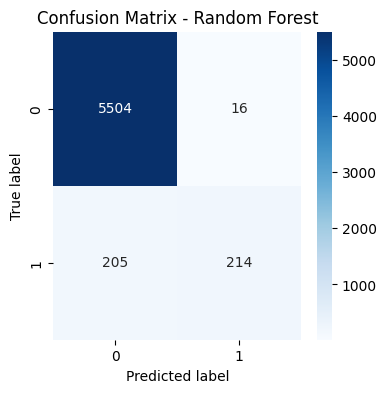

Accuracy: 96.28%
Macro Avg Precision: 94.73%
Macro Avg Recall: 75.39%
F1 Score: 65.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5520
           1       0.93      0.51      0.66       419

    accuracy                           0.96      5939
   macro avg       0.95      0.75      0.82      5939
weighted avg       0.96      0.96      0.96      5939


SVM Results:


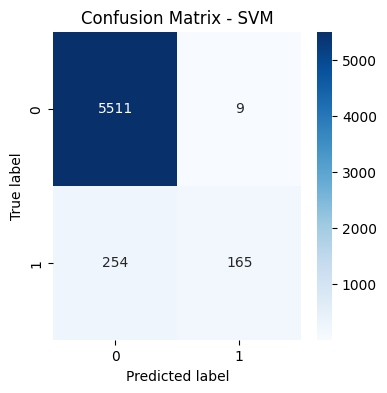

Accuracy: 95.57%
Macro Avg Precision: 95.21%
Macro Avg Recall: 69.61%
F1 Score: 55.65%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5520
           1       0.95      0.39      0.56       419

    accuracy                           0.96      5939
   macro avg       0.95      0.70      0.77      5939
weighted avg       0.96      0.96      0.95      5939


KNN Results:


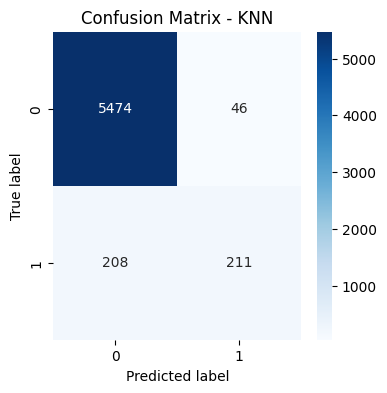

Accuracy: 95.72%
Macro Avg Precision: 89.22%
Macro Avg Recall: 74.76%
F1 Score: 62.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5520
           1       0.82      0.50      0.62       419

    accuracy                           0.96      5939
   macro avg       0.89      0.75      0.80      5939
weighted avg       0.95      0.96      0.95      5939


XGBoost Results:


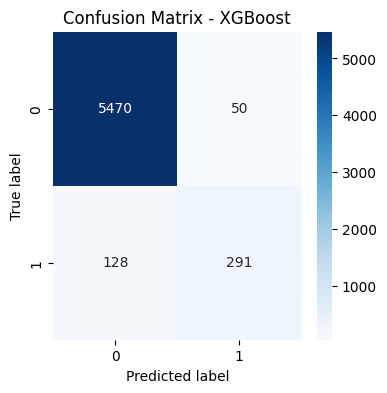

Accuracy: 97.00%
Macro Avg Precision: 91.53%
Macro Avg Recall: 84.27%
F1 Score: 76.58%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5520
           1       0.85      0.69      0.77       419

    accuracy                           0.97      5939
   macro avg       0.92      0.84      0.87      5939
weighted avg       0.97      0.97      0.97      5939



In [ ]:
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=400,random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN',KNeighborsClassifier()),
    ('XGBoost',XGBClassifier())
]
accdict = dict()
for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    print(f"\n{name} Results:")
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, f"Confusion Matrix - {name}")
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    accdict[name] = [accuracy,f1,prec,recall]
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Macro Avg Precision: {prec*100:.2f}%")
    print(f"Macro Avg Recall: {recall*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

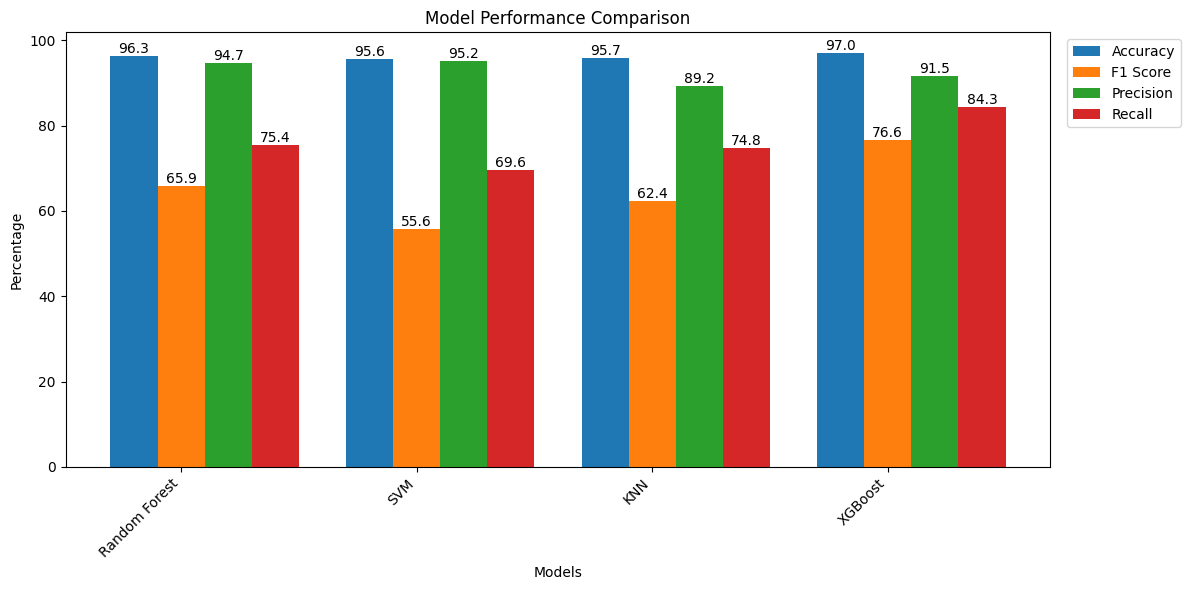

In [ ]:
models = list(accdict.keys())
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
data = {metric: [accdict[model][i] * 100 for model in models] for i, metric in enumerate(metrics)}
fig, ax = plt.subplots(figsize=(16, 8))

bar_width = 0.2
r = range(len(models))

for i, metric in enumerate(metrics):
    ax.bar([x + i * bar_width for x in r], data[metric], width=bar_width, label=metric)

ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_title('Model Performance Comparison', fontsize=20)
ax.set_xticks([x + bar_width for x in r])
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=14)

ax.legend(bbox_to_anchor=(1.01, 1), fontsize=20)

for i, metric in enumerate(metrics):
    for j, value in enumerate(data[metric]):
        ax.text(j + i * bar_width, value, f'{value:.1f}', ha='center', va='bottom', fontsize=14)
plt.tight_layout()
plt.savefig('Comparison of Model Performances.png',dpi=300)
plt.show()

In [ ]:
param_dist = {
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 20),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 1),
    'subsample': uniform(0.3, 1),
    'colsample_bytree': uniform(0.5, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'scale_pos_weight': uniform(1, 15),
}
xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=2,
)
random_search.fit(X_train_sc, y_train)
print("Best hyperparameters:", random_search.best_params_)
print("Best f1-score:", random_search.best_score_)

best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test_sc)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score on test set with best model: {f1*100:.2f}%")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'colsample_bytree': 0.8502618422290751, 'gamma': 0.3640469643922086, 'learning_rate': 0.035124594488589005, 'max_depth': 15, 'min_child_weight': 8, 'n_estimators': 446, 'reg_alpha': 0.5217699653671907, 'reg_lambda': 0.978645901168887, 'scale_pos_weight': 12.773325732501078, 'subsample': 0.8219855329522607}
Best f1-score: 0.7280702145349892
F1-Score on test set with best model: 80.09%


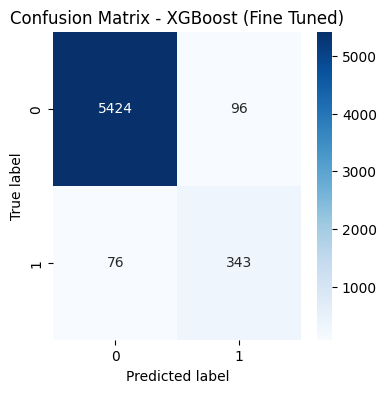

Accuracy: 97.1%
Macro Avg Precision: 88.4%
Macro Avg Recall: 90.1%
F1 Score: 80.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5520
           1       0.78      0.82      0.80       419

    accuracy                           0.97      5939
   macro avg       0.88      0.90      0.89      5939
weighted avg       0.97      0.97      0.97      5939



In [ ]:
best_params = {'colsample_bytree': 0.8502618422290751, 'gamma': 0.3640469643922086, 'learning_rate': 0.035124594488589005, 'max_depth': 15, 'min_child_weight': 8, 'n_estimators': 446, 'reg_alpha': 0.5217699653671907, 'reg_lambda': 0.978645901168887, 'scale_pos_weight': 12.773325732501078, 'subsample': 0.8219855329522607}
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train_sc, y_train)
y_pred = best_xgb_model.predict(X_test_sc)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,"Confusion Matrix - XGBoost (Fine Tuned)")
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy*100:.1f}%")
print(f"Macro Avg Precision: {prec*100:.1f}%")
print(f"Macro Avg Recall: {recall*100:.1f}%")
print(f"F1 Score: {f1*100:.1f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

### **Performance of XGBoost with and without SMOTE**

#### **Training XGBoost without SMOTE and with Weighted Loss**

In [ ]:
def eval_model_on_testset(model,cmtitle):
    y_pred_test = model.predict(X_test_sc)
    cm = confusion_matrix(y_test, y_pred_test)
    plot_confusion_matrix(cm,f"Confusion Matrix - {cmtitle}")
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, average='macro')
    recall = recall_score(y_test, y_pred_test, average='macro')
    y_proba = model.predict_proba(X_test_sc)[:,1]
    pr_auc = average_precision_score(y_test, y_proba)
    print(f"Accuracy: {accuracy*100:.1f}%")
    print(f"Macro Avg Precision: {prec*100:.1f}%")
    print(f"Macro Avg Recall: {recall*100:.1f}%")
    print(f"F1 Score: {f1*100:.1f}%")
    print(f"PR-AUC: {pr_auc:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

In [ ]:
best_params = {'colsample_bytree': 0.8502618422290751, 'gamma': 0.3640469643922086, 'learning_rate': 0.035124594488589005,
               'max_depth': 15, 'min_child_weight': 8, 'n_estimators': 446, 'reg_alpha': 0.5217699653671907,
               'reg_lambda': 0.978645901168887, 'scale_pos_weight': 12.773325732501078, 'subsample': 0.8219855329522607}
best_xgb_model_tuned = XGBClassifier(**best_params)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'f1': 'f1',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'accuracy': 'accuracy'
}

results = cross_validate(best_xgb_model_tuned, X_train_sc, y_train, cv=cv,
                         scoring=scoring, return_estimator=True, return_train_score=False)
print("Accuracy:", results['test_accuracy'])
print(f"Mean Accuracy: {results['test_accuracy'].mean()*100:.1f}%\n")
print("Macro Precision:", results['test_precision_macro'])
print(f"Mean Macro Precision: {results['test_precision_macro'].mean()*100:.1f}%\n")
print("Macro Recall :", results['test_recall_macro'])
print(f"Mean Macro Recall: {results['test_recall_macro'].mean()*100:.1f}%\n")
print("F1 Score:", results['test_f1'])
print(f"Mean F1 Score: {results['test_f1'].mean()*100:.1f}%\n")

Accuracy: [0.96211324 0.9637971  0.9625342  0.96442854 0.96337613]
Mean Accuracy: 96.3%

Macro Precision: [0.8604174  0.86645043 0.85650056 0.85761311 0.85624273]
Mean Macro Precision: 85.9%

Macro Recall : [0.84444692 0.85224928 0.8584665  0.88017521 0.8699539 ]
Mean Macro Recall: 86.1%

F1 Score: [0.72477064 0.73780488 0.73511905 0.75613276 0.74561404]
Mean F1 Score: 74.0%



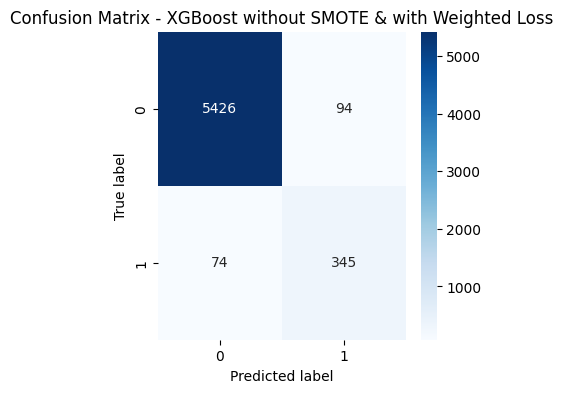

Accuracy: 97.2%
Macro Avg Precision: 88.6%
Macro Avg Recall: 90.3%
F1 Score: 80.4%
PR-AUC: 0.881

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5520
           1       0.79      0.82      0.80       419

    accuracy                           0.97      5939
   macro avg       0.89      0.90      0.89      5939
weighted avg       0.97      0.97      0.97      5939



In [ ]:
f1_scores = results['test_f1']
models = results['estimator']
best_index = np.argmax(f1_scores)
best_model = models[best_index]
best_model.fit(X_train_sc, y_train)
eval_model_on_testset(best_model, cmtitle="XGBoost without SMOTE & with Weighted Loss")

#### **Training XGBoost without SMOTE and with Unweighted Loss**

In [ ]:


param_dist = {
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 12),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 1),
    'subsample': uniform(0.3, 1),
    'colsample_bytree': uniform(0.5, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}
xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=2,
)
random_search.fit(X_train_sc, y_train)
print("Best hyperparameters:", random_search.best_params_)
print("Best f1-score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'colsample_bytree': np.float64(0.8690823892830855), 'gamma': np.float64(0.8386884825917712), 'learning_rate': np.float64(0.11650490212451374), 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 424, 'reg_alpha': np.float64(0.826086294235386), 'reg_lambda': np.float64(0.5328631158929701), 'subsample': np.float64(0.8218518005267561)}
Best f1-score: 0.679263186237952


In [ ]:
best_xgb_model_tuned = XGBClassifier(**random_search.best_params_)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'f1': 'f1',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'accuracy': 'accuracy'
}

results = cross_validate(best_xgb_model_tuned, X_train, y_train, cv=cv, scoring=scoring,
                         return_estimator=True, return_train_score=False)
print("Accuracy:", results['test_accuracy'])
print(f"Mean Accuracy: {results['test_accuracy'].mean()*100:.1f}%\n")
print("Macro Precision:", results['test_precision_macro'])
print(f"Mean Macro Precision: {results['test_precision_macro'].mean()*100:.1f}%\n")
print("Macro Recall :", results['test_recall_macro'])
print(f"Mean Macro Recall: {results['test_recall_macro'].mean()*100:.1f}%\n")
print("F1 Score:", results['test_f1'])
print(f"Mean F1 Score: {results['test_f1'].mean()*100:.1f}%\n")


Accuracy: [0.96295517 0.96274469 0.9637971  0.96548095 0.96190276]
Mean Accuracy: 96.3%

Macro Precision: [0.90799034 0.91191998 0.90698745 0.91039747 0.89512072]
Mean Macro Precision: 90.6%

Macro Recall : [0.78558938 0.7799589  0.79431815 0.80625845 0.78916119]
Mean Macro Recall: 79.1%

F1 Score: [0.68794326 0.68222621 0.6993007  0.71724138 0.68521739]
Mean F1 Score: 69.4%



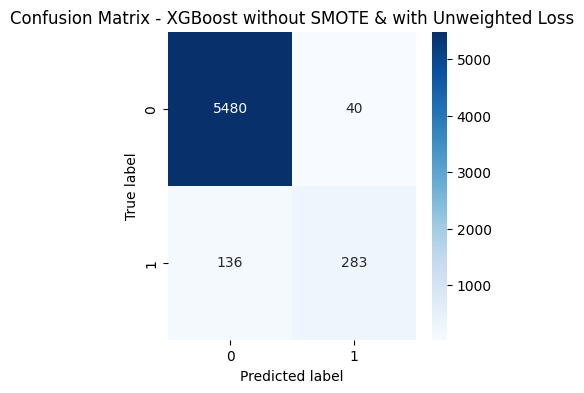

Accuracy: 97.0%
Macro Avg Precision: 92.6%
Macro Avg Recall: 83.4%
F1 Score: 76.3%
PR-AUC: 0.857

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5520
           1       0.88      0.68      0.76       419

    accuracy                           0.97      5939
   macro avg       0.93      0.83      0.87      5939
weighted avg       0.97      0.97      0.97      5939



In [ ]:
f1_scores = results['test_f1']
models = results['estimator']
best_index = np.argmax(f1_scores)
best_model = models[best_index]

best_model.fit(X_train_sc, y_train)
eval_model_on_testset(best_model, cmtitle="XGBoost without SMOTE & with Unweighted Loss")

#### **Training XGBoost with SMOTE and Unweighted Loss**

In [ ]:
param_dist = {
    'xgb__learning_rate': uniform(0.01, 0.5),
    'xgb__n_estimators': randint(50, 500),
    'xgb__max_depth': randint(3, 12),
    'xgb__min_child_weight': randint(1, 10),
    'xgb__gamma': uniform(0, 1),
    'xgb__subsample': uniform(0.3, 1),
    'xgb__colsample_bytree': uniform(0.5, 1),
    'xgb__reg_alpha': uniform(0, 1),
    'xgb__reg_lambda': uniform(0, 1),
}
pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier())
])
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=2,
)
random_search.fit(X_train_sc, y_train)
print("Best hyperparameters:", random_search.best_params_)
print("Best f1-score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'xgb__colsample_bytree': np.float64(0.7139213783413182), 'xgb__gamma': np.float64(0.1845360613656588), 'xgb__learning_rate': np.float64(0.06380228367091827), 'xgb__max_depth': 6, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 304, 'xgb__reg_alpha': np.float64(0.8178253393648077), 'xgb__reg_lambda': np.float64(0.08859324076959618), 'xgb__subsample': np.float64(0.9090307049308082)}
Best f1-score: 0.71187632993088


In [ ]:
best_xgb_model_tuned = XGBClassifier(**random_search.best_params_)

pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', best_xgb_model_tuned)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'f1': 'f1',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'accuracy': 'accuracy'
}

results = cross_validate(pipe, X_train_sc, y_train, cv=cv, scoring=scoring, return_estimator=True, return_train_score=False)
print("Accuracy:", results['test_accuracy'])
print(f"Mean Accuracy: {results['test_accuracy'].mean()*100:.1f}%\n")
print("Macro Precision:", results['test_precision_macro'])
print(f"Mean Macro Precision: {results['test_precision_macro'].mean()*100:.1f}%\n")
print("Macro Recall :", results['test_recall_macro'])
print(f"Mean Macro Recall: {results['test_recall_macro'].mean()*100:.1f}%\n")
print("F1 Score:", results['test_f1'])
print(f"Mean F1 Score: {results['test_f1'].mean()*100:.1f}%\n")

Accuracy: [0.96000842 0.96106083 0.96127131 0.95937697 0.95706167]
Mean Accuracy: 96.0%

Macro Precision: [0.8496673  0.84649395 0.84954739 0.83572918 0.82796405]
Mean Macro Precision: 84.2%

Macro Recall : [0.84193536 0.86457049 0.85916646 0.87331988 0.86379853]
Mean Macro Recall: 86.1%

F1 Score: [0.71299094 0.73149492 0.72941176 0.72855134 0.71267606]
Mean F1 Score: 72.3%



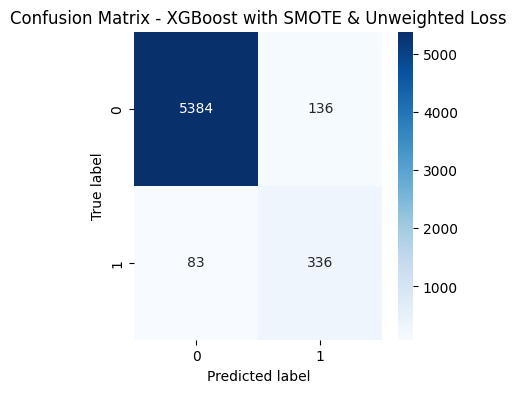

Accuracy: 96.3%
Macro Avg Precision: 84.8%
Macro Avg Recall: 88.9%
F1 Score: 75.4%
PR-AUC: 0.845

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5520
           1       0.71      0.80      0.75       419

    accuracy                           0.96      5939
   macro avg       0.85      0.89      0.87      5939
weighted avg       0.97      0.96      0.96      5939



In [ ]:
f1_scores = results['test_f1']
pipes = results['estimator']
best_index = np.argmax(f1_scores)
best_pipe = pipes[best_index]

best_pipe.fit(X_train_sc, y_train)
eval_model_on_testset(best_pipe, cmtitle="XGBoost with SMOTE & with Unweighted Loss")

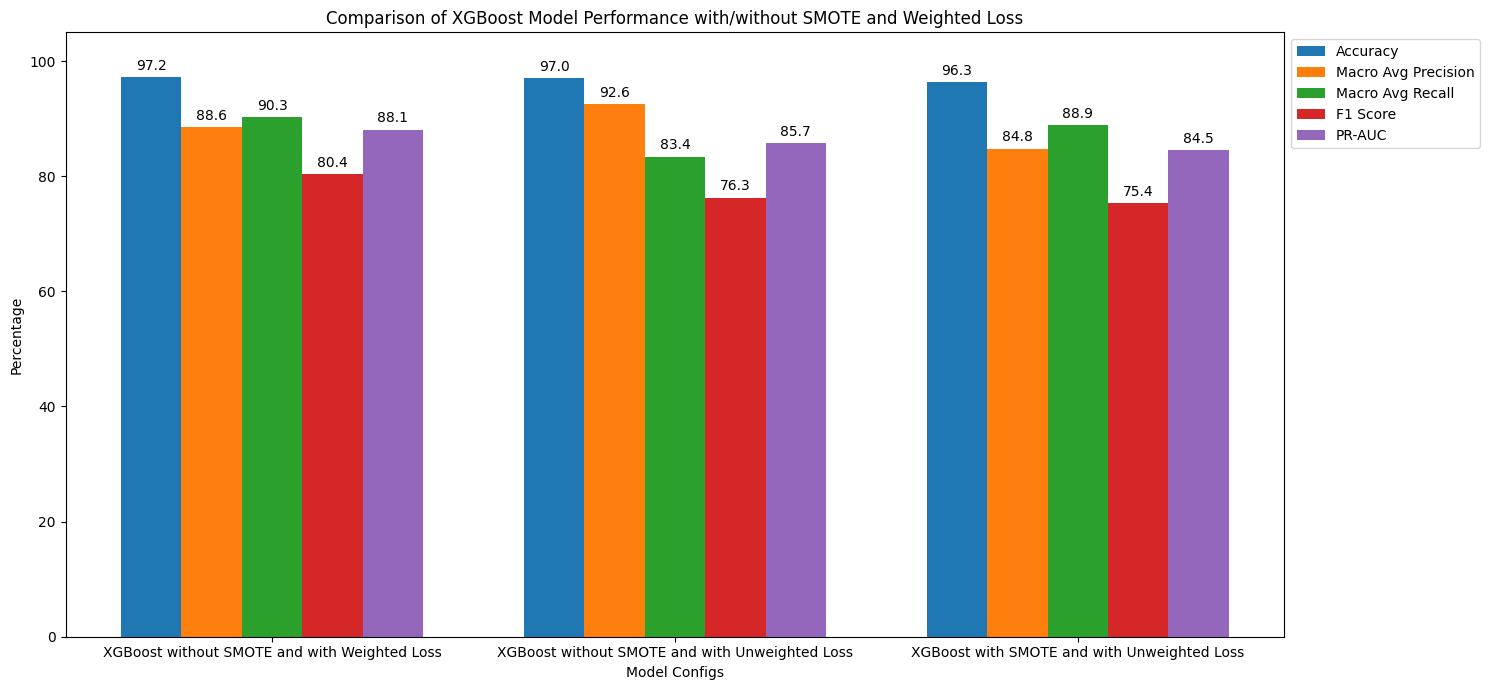

In [ ]:
models = ['XGBoost without SMOTE and with Weighted Loss', 'XGBoost without SMOTE and with Unweighted Loss',
          'XGBoost with SMOTE and with Unweighted Loss']
accuracy = [97.2, 97.0, 96.3]
macro_prec = [88.6, 92.6, 84.8]
macro_recall = [90.3, 83.4, 88.9]
f1 = [80.4, 76.3, 75.4]
pr_auc = [0.881 * 100, 0.857 * 100, 0.845 * 100] # Scale PR-AUC to percentage for plotting

metrics_data = {
    'Accuracy': accuracy,
    'Macro Avg Precision': macro_prec,
    'Macro Avg Recall': macro_recall,
    'F1 Score': f1,
    'PR-AUC': pr_auc
}

metrics = list(metrics_data.keys())
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(20, 9))

for i, metric in enumerate(metrics):
    offset = width * i
    rects = ax.bar(x + offset, metrics_data[metric], width, label=metric)
    ax.bar_label(rects, padding=3, fmt='%.1f',fontsize=14)

ax.set_xlabel('Model Configs',fontsize=14)
ax.set_ylabel('Percentage',fontsize=14)
ax.set_title('Comparison of XGBoost Model Performance with/without SMOTE and Weighted Loss',fontsize=20)
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=14)
ax.set_ylim(0, 105)

plt.tight_layout()
plt.savefig('Comparison of XGBoost Model Performance with and without SMOTE and Weighted Loss.png',dpi=300)
plt.show()

In [ ]:
models = ['XGBoost without SMOTE and with Weighted Loss', 'XGBoost without SMOTE and with Unweighted Loss',
          'XGBoost with SMOTE and with Unweighted Loss']
accuracy = [97.2, 97.0, 96.3]
macro_prec = [88.6, 92.6, 84.8]
macro_recall = [90.3, 83.4, 88.9]
f1 = [80.4, 76.3, 75.4]
pr_auc = [0.881, 0.857, 0.845]

performance_df = pd.DataFrame({
    'Model Config': models,
    'Accuracy': accuracy,
    'Macro Avg Precision': macro_prec,
    'Macro Avg Recall': macro_recall,
    'F1 Score': f1,
    'PR-AUC': pr_auc
})

performance_df.to_csv('/content/drive/MyDrive/drought_flood_prediction/performance_with_diff_model_configs.csv', index=False)

display(performance_df)

Model Config  Accuracy  \
0    XGBoost without SMOTE and with Weighted Loss      97.2   
1  XGBoost without SMOTE and with Unweighted Loss      97.0   
2     XGBoost with SMOTE and with Unweighted Loss      96.3   

   Macro Avg Precision  Macro Avg Recall  F1 Score  PR-AUC  
0                 88.6              90.3      80.4   0.881  
1                 92.6              83.4      76.3   0.857  
2                 84.8              88.9      75.4   0.845

In [ ]:
xgbmodel_files = [best_xgb_model,sc,le1,le2]
with open('/content/drive/MyDrive/drought_flood_prediction/xgbmodel_files.pkl', 'wb') as f:
    pickle.dump(xgbmodel_files, f)

In [ ]:
with open('/content/drive/MyDrive/drought_flood_prediction/xgbmodel_files.pkl', 'rb') as f:
    xgbmodel_files = pickle.load(f)
best_xgb_model = xgbmodel_files[0]
sc = xgbmodel_files[1]
le1 = xgbmodel_files[2]
le2 = xgbmodel_files[3]

### **Uncertainty Matrix for Best XGBoost Model**

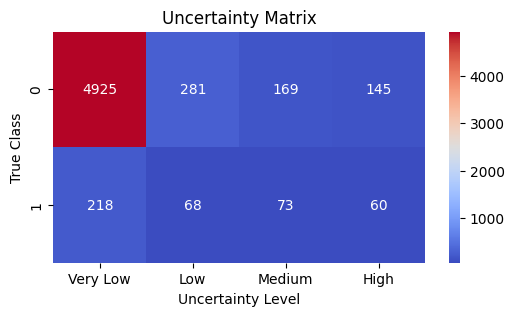

In [ ]:
probs = best_xgb_model.predict_proba(X_test_sc)
uncertainties = entropy(probs, axis=1)
confidences = 1 - probs.max(axis=1)
sorted_probs = np.sort(probs, axis=1)
margins = 1 - (sorted_probs[:, -1] - sorted_probs[:, -2])

bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
binned_uncertainty = pd.cut(uncertainties, bins=bins, labels=labels)
uncertainty_matrix = pd.crosstab(y_test, binned_uncertainty, rownames=['True Class'], colnames=['Uncertainty Level'])
#uncertainty_matrix = uncertainty_matrix.reindex(columns=labels, fill_value=0)
plt.figure(figsize=(6, 3))
sns.heatmap(uncertainty_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title("Uncertainty Matrix")
plt.show()

In [ ]:
vh = [u for u in uncertainties if u<=0.8]
len(vh)

5939

### **xAI using SHAP and LIME**

In [ ]:
pip install shap

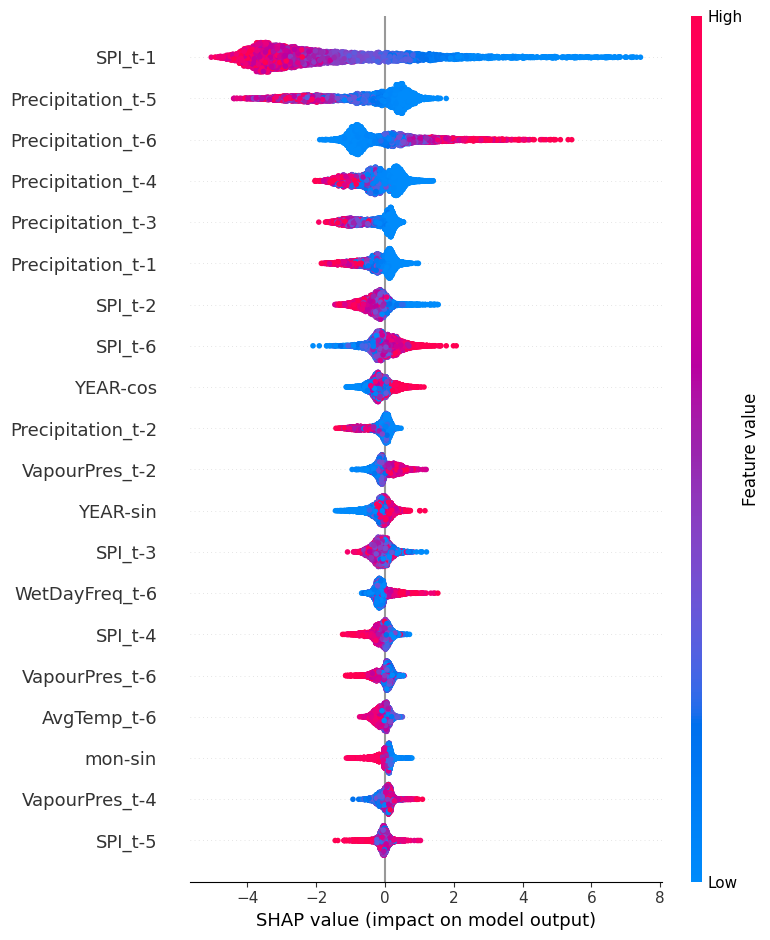

In [ ]:
import shap
xgb = XGBClassifier()
xgb.fit(X_train_sc, y_train)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test_sc)
cols = list(all.columns[:-1])
shap.summary_plot(shap_values, X_test_sc,feature_names=cols)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[5],X_test_sc[5],feature_names=cols)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[:5],X_test_sc[:5],feature_names=cols)

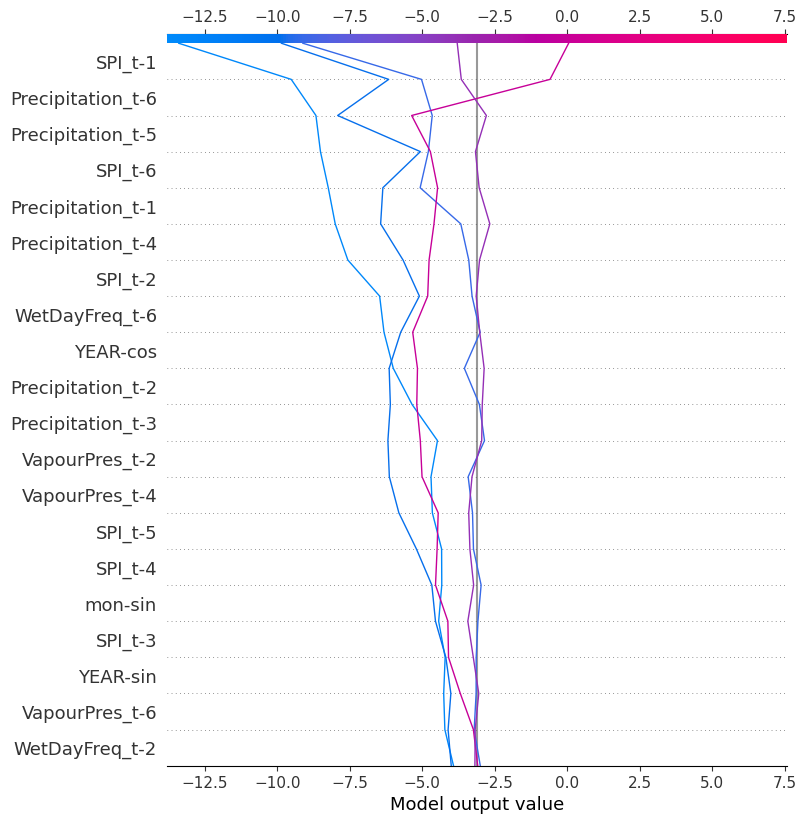

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values.values[:5],feature_names=cols)

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1a909e94e42b6d2a32d3a0626d10845b84d6af221b85f71f68ac404c60bc8ed1
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train_sc, feature_names=X.columns.tolist(), class_names=[0, 1])
i = 80
explanation = explainer.explain_instance(X_test_sc[i], best_xgb_model.predict_proba, num_features=10)
explanation.show_in_notebook()

In [ ]:
import shap
best_params = {'colsample_bytree': 0.8502618422290751, 'gamma': 0.3640469643922086, 'learning_rate': 0.035124594488589005,
               'max_depth': 15, 'min_child_weight': 8, 'n_estimators': 446, 'reg_alpha': 0.5217699653671907,
               'reg_lambda': 0.978645901168887, 'scale_pos_weight': 12.773325732501078, 'subsample': 0.8219855329522607}
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8502618422290751, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.3640469643922086, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.035124594488589005,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=446, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd

Xtr = X_train_sc.values if hasattr(X_train_sc, "values") else X_train_sc
Xte = X_test_sc.values if hasattr(X_test_sc, "values") else X_test_sc
cols = all.columns[:-1]
feature_names = list(X_test_sc.columns) if hasattr(X_test_sc, 'columns') else cols

# Use XGBoost’s native SHAP contributions
bst = best_xgb_model.get_booster()
phi = bst.predict(xgb.DMatrix(Xte), pred_contribs=True, approx_contribs=False)
# shape: [n_samples, n_features + 1]; last column is the expected value (bias term)

In [ ]:
# Construct Explanation in raw (logit) space – what XGBoost returns
base_vals = phi[:, -1]                        # bias term
vals = phi[:, :-1]                            # per-feature SHAP
data = X_test_sc                              # to label axes nicely

exp = shap.Explanation(values=vals,
                       base_values=base_vals,
                       data=data,
                       feature_names=feature_names)

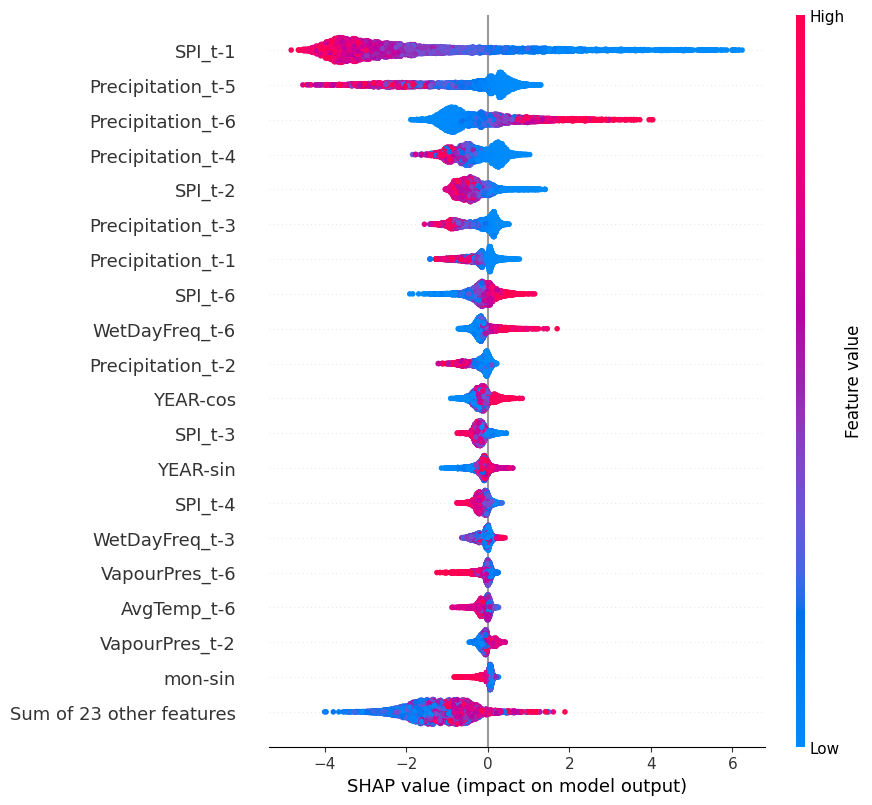

In [ ]:
shap.plots.beeswarm(exp, max_display=20)

#### **Top 5 Important Features per State using SHAP**

In [ ]:
df_test = all.loc[X_test.index]
df_test['STATE'] = le2.inverse_transform(df_test['STATE'])
# SHAP DataFrame
sv = vals.values if hasattr(vals, "values") else vals
shap_df = pd.DataFrame(sv, columns=feature_names, index=df_test.index)

# Combine with metadata
shap_with_state = shap_df.abs().join(
    df_test[['STATE']].rename(columns={"STATE": "STATE_META"})
)

# ✅ Correct grouping key
per_state = shap_with_state.groupby('STATE_META').mean()

# Extract top 5
topk_by_state = {}
K = 5
for st, row in per_state.iterrows():
    s = row.sort_values(ascending=False).head(K)
    topk_by_state[st] = s.index.tolist()

# Build table
rows = []
for st, feats in topk_by_state.items():
    rows.append([st] + feats)

per_state_table = pd.DataFrame(
    rows,
    columns=['STATE'] + [f'Top{i}' for i in range(1, K+1)]
)

per_state_table.to_csv('/content/drive/MyDrive/drought_flood_prediction/shap_top5_feats_per_state.csv', index=False)
print("Saved: shap_top5_feats_per_state.csv")
per_state_table.head()

Saved: shap_top5_feats_per_state.csv


STATE     Top1               Top2               Top3  \
0  ANDHRA PRADESH  SPI_t-1  Precipitation_t-5  Precipitation_t-6   
1           BIHAR  SPI_t-1  Precipitation_t-5  Precipitation_t-6   
2         GUJARAT  SPI_t-1  Precipitation_t-6  Precipitation_t-5   
3       KARNATAKA  SPI_t-1  Precipitation_t-5  Precipitation_t-6   
4     MAHARASHTRA  SPI_t-1  Precipitation_t-5  Precipitation_t-6   

                Top4               Top5  
0            SPI_t-2  Precipitation_t-4  
1  Precipitation_t-4            SPI_t-2  
2  Precipitation_t-4            SPI_t-2  
3  Precipitation_t-4            SPI_t-2  
4  Precipitation_t-4            SPI_t-2

#### **LIME Case Study: One Drought case in Gujarat vs One Non-Drought Case in Bihar**

In [ ]:
# pick one drought event from Gujarat
test_df = df.loc[X_test.index]
guj_drought_row = test_df[(test_df.STATE == 'GUJARAT') & (test_df.CLASS == 1)].sort_values(by="YEAR",ascending=False).iloc[0]
guj_state, guj_dist, guj_year, guj_mon = (
    guj_drought_row.STATE,
    guj_drought_row.DISTRICT,
    guj_drought_row.YEAR,
    guj_drought_row.mon
)

# pick one non-drought event from Bihar
bihar_non_row = test_df[(test_df.STATE == 'BIHAR') & (test_df.CLASS == 0)].sort_values(by="YEAR",ascending=False).iloc[0]
b_state, b_dist, b_year, b_mon = (
    bihar_non_row.STATE,
    bihar_non_row.DISTRICT,
    bihar_non_row.YEAR,
    bihar_non_row.mon
)

print("Selected Gujarat drought example:", guj_state, guj_dist, guj_year, guj_mon)
print("Selected Bihar non-drought example:", b_state, b_dist, b_year, b_mon)


Selected Gujarat drought example: GUJARAT PATAN 2022 Dec
Selected Bihar non-drought example: BIHAR SIWAN 2022 Oct


In [ ]:
def get_scaled_row(df_full, X_scaled, state, dist, year, mon):
    mask = (
        (df_full.STATE == state) &
        (df_full.DISTRICT == dist) &
        (df_full.YEAR == year) &
        (df_full.mon == mon)
    )
    idx = df_full[mask].index[0]
    return X_scaled.loc[idx].values, idx

In [ ]:
X_train_sc_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_sc_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [ ]:
df.loc[X_test.index]

AvgTemp  mon  YEAR    DISTRICT           STATE  PotentialEvapTran  \
5307    30.104  Apr  2006  AURANGABAD           BIHAR               8.30   
15961    1.318  Feb  1976   PORBANDAR         GUJARAT               0.38   
21883   24.525  Aug  2010      KOPPAL       KARNATAKA               5.09   
6433    18.347  Feb  1998       BUXAR           BIHAR               5.35   
3788    27.949  Sep  1981    PRAKASAM  ANDHRA PRADESH               5.87   
...        ...  ...   ...         ...             ...                ...   
13538   17.942  Mar  1978    JAMNAGAR         GUJARAT               4.92   
14291   11.012  Dec  1989    JUNAGADH         GUJARAT               2.69   
29071   26.255  Aug  1997   OSMANABAD     MAHARASHTRA               5.68   
25384   33.219  May  1996     HINGOLI     MAHARASHTRA               8.93   
6420    15.952  Jan  1997       BUXAR           BIHAR               4.82   

       Precipitation   SPI  VapourPres  WetDayFreq  CLASS  
5307          10.118  0.17      14.882       1.079      0  
15961          0.000  1.04       0.909       0.000      0  
21883         91.519 -0.26      23.065      10.013      0  
6433          65.255  1.04      12.753       3.331      0  
3788          63.526  0.61      26.649       6.998      0  
...              ...   ...         ...         ...    ...  
13538          0.000  0.72      13.349       0.000      0  
14291          0.654 -0.47       7.726       0.311      0  
29071         64.830 -0.85      23.575       5.884      0  
25384          1.536 -1.07      16.616       0.697      0  
6420           9.430  0.47      12.546       1.065      0  

[5939 rows x 11 columns]

In [ ]:
lime_exp = LimeTabularExplainer(
    training_data=X_train_sc_df.values,
    feature_names=X_train_sc_df.columns.tolist(),
    class_names=['No drought','Drought'],
    mode='classification'
)

# Gujarat drought example
x_guj, idx_guj = get_scaled_row(df.loc[X_test.index], X_test_sc_df, guj_state, guj_dist, guj_year, guj_mon)
exp_guj = lime_exp.explain_instance(
    x_guj,
    predict_fn=best_xgb_model.predict_proba,
    num_features=10
)
exp_guj.save_to_file("lime_gujarat_drought.html")

# Bihar non-drought example
x_bihar, idx_bihar = get_scaled_row(df.loc[X_test.index], X_test_sc_df, b_state, b_dist, b_year, b_mon)
exp_bihar = lime_exp.explain_instance(
    x_bihar,
    predict_fn=best_xgb_model.predict_proba,
    num_features=10
)
exp_bihar.save_to_file("lime_bihar_non_drought.html")

print("Saved: lime_gujarat_drought.html, lime_bihar_non_drought.html")

Saved: lime_gujarat_drought.html, lime_bihar_non_drought.html


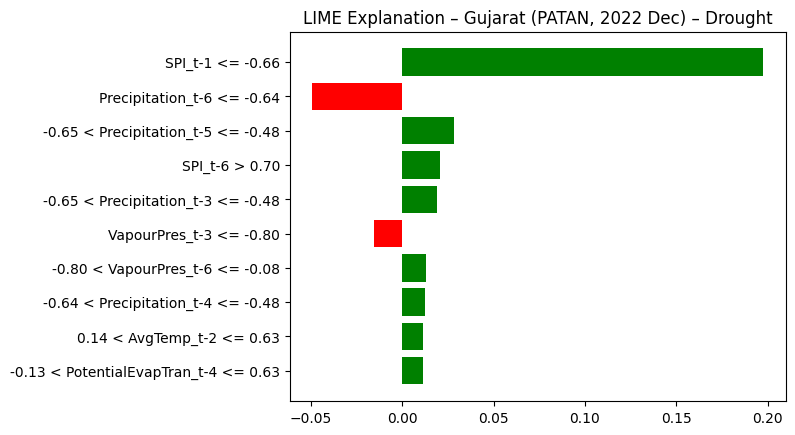

In [ ]:
fig = exp_guj.as_pyplot_figure()
plt.title(f"LIME Explanation – Gujarat ({guj_dist}, {guj_year} {guj_mon}) – Drought")
plt.show()

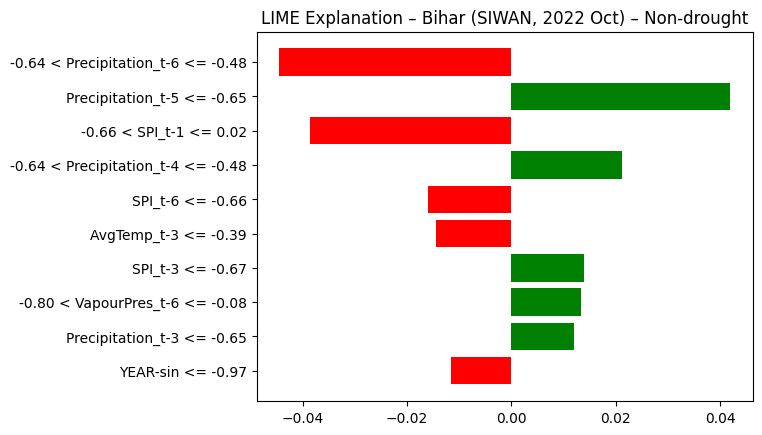

In [ ]:
fig = exp_bihar.as_pyplot_figure()
plt.title(f"LIME Explanation – Bihar ({b_dist}, {b_year} {b_mon}) – Non-drought")
plt.show()

#### **Probabilistic Insight Generation for Policy**

In [ ]:
def computeChangeInProb(model, X: pd.DataFrame, feature: str, delta: float = -1.0, proba_class: int = 1):
    """
    Computes change in predicted probability when 'feature' is shifted by delta.
    """
    # Select only features used in model
    X_use = X.copy()
    predict_proba_fn = lambda df: model.predict_proba(df)

    # Baseline predictions
    p0 = predict_proba_fn(X_use)[:, proba_class]

    # Counterfactual shift
    X_cf = X_use.copy()
    X_cf[feature] = X_cf[feature] + delta

    p1 = predict_proba_fn(X_cf)[:, proba_class]

    dp = p1 - p0
    mean_dp = dp.mean()

    return {
        "baseline_prob": p0.mean(),
        "delta": delta,
        "pp_change": mean_dp * 100,
        "direction": "increase" if mean_dp > 0 else "decrease"
    }


def insight_text(feature_name, delta, state, returnpcs=False):
    stateenc = le2.transform([state])[0]
    X_test_state = X_test[X_test['STATE']==stateenc]
    effect = computeChangeInProb(best_xgb_model, X_test_state, feature=feature_name, delta=delta)
    di = "drop" if delta<0 else "increment"
    pp = round(effect["pp_change"], 2)
    base = round(effect["baseline_prob"] * 100, 2)
    dirc = effect["direction"]
    featname = feature.split('_')[0]
    monsprior = abs(int(feature.split('_')[1].replace('t','')))
    mns = "months" if monsprior > 1 else "month"
    if returnpcs:
        return pp, base, dirc
    else:
        return (
            f"A {abs(delta)}-unit {di} in {featname} {monsprior} {mns} prior {dirc}s drought probability by "
            f"{abs(pp):.2f}% in districts of {state}, "
            f"relative to a baseline drought probability of {base:.2f}%."
        )
feature = "SPI_t-1"

print(insight_text(feature, delta=-1, state="GUJARAT"))

A 1-unit drop in SPI 1 month prior increases drought probability by 18.66% in districts of GUJARAT, relative to a baseline drought probability of 7.53%.


In [ ]:
states = ["GUJARAT", "BIHAR", "ANDHRA PRADESH", "MAHARASHTRA", "KARNATAKA"]
deltas = [-1, 1]
features = ["SPI_t-1", "Precipitation_t-6"]

rows = []

for state in states:
    for feature in features:
        for delta in deltas:
            pp, base, dirc = insight_text(feature, delta, state, returnpcs=True)
            rows.append({
                "State": state,
                "Feature": feature,
                "Delta": delta,
                "Increment/Drop": "Drop" if pp<0 else "Increment",
                "Change in Prob": abs(pp),
                "Baseline Prob": base,
            })

insight_df = pd.DataFrame(rows)
insight_df.to_csv("/content/drive/MyDrive/drought_flood_prediction/Probabilistic Insights for Top 2 Important Features and Different States.csv",index=False)
insight_df

State            Feature  Delta Increment/Drop  Change in Prob  \
0          GUJARAT            SPI_t-1     -1      Increment       18.660000   
1          GUJARAT            SPI_t-1      1           Drop        5.640000   
2          GUJARAT  Precipitation_t-6     -1           Drop        1.100000   
3          GUJARAT  Precipitation_t-6      1      Increment        2.210000   
4            BIHAR            SPI_t-1     -1      Increment       17.770000   
5            BIHAR            SPI_t-1      1           Drop        6.740000   
6            BIHAR  Precipitation_t-6     -1           Drop        0.260000   
7            BIHAR  Precipitation_t-6      1      Increment        0.200000   
8   ANDHRA PRADESH            SPI_t-1     -1      Increment       16.540001   
9   ANDHRA PRADESH            SPI_t-1      1           Drop        4.870000   
10  ANDHRA PRADESH  Precipitation_t-6     -1           Drop        0.310000   
11  ANDHRA PRADESH  Precipitation_t-6      1      Increment        0.500000   
12     MAHARASHTRA            SPI_t-1     -1      Increment       16.230000   
13     MAHARASHTRA            SPI_t-1      1           Drop        5.930000   
14     MAHARASHTRA  Precipitation_t-6     -1           Drop        0.460000   
15     MAHARASHTRA  Precipitation_t-6      1      Increment        0.570000   
16       KARNATAKA            SPI_t-1     -1      Increment       18.150000   
17       KARNATAKA            SPI_t-1      1           Drop        6.260000   
18       KARNATAKA  Precipitation_t-6     -1           Drop        0.350000   
19       KARNATAKA  Precipitation_t-6      1      Increment        0.510000   

    Baseline Prob  
0            7.53  
1            7.53  
2            7.53  
3            7.53  
4            8.59  
5            8.59  
6            8.59  
7            8.59  
8            6.12  
9            6.12  
10           6.12  
11           6.12  
12           7.67  
13           7.67  
14           7.67  
15           7.67  
16           7.45  
17           7.45  
18           7.45  
19           7.45

### **Prediction of Drought for 2023**

In [ ]:
odf = pd.read_csv('/content/drive/MyDrive/drought_flood_prediction/final.csv')
odf.tail(6)

AvgTemp  mon  YEAR  DISTRICT        STATE  PotentialEvapTran  \
29982   27.242  Jul  2022  PARBHANI  MAHARASHTRA               6.25   
29983   24.965  Aug  2022  PARBHANI  MAHARASHTRA               5.42   
29984   25.917  Sep  2022  PARBHANI  MAHARASHTRA               6.11   
29985   26.912  Oct  2022  PARBHANI  MAHARASHTRA               6.62   
29986   23.664  Nov  2022  PARBHANI  MAHARASHTRA               6.26   
29987   22.715  Dec  2022  PARBHANI  MAHARASHTRA               5.89   

       Precipitation   SPI  VapourPres  WetDayFreq  CLASS  
29982         35.750 -0.71      25.869       4.228      0  
29983        206.450 -0.28      24.204       9.360      0  
29984        134.435 -0.54      23.960       6.664      0  
29985         55.296 -0.65      16.737       2.700      0  
29986          3.397 -0.74      13.114       1.072      0  
29987          0.000 -1.29      11.702       0.000      0

In [ ]:
weather_columns = ['AvgTemp', 'PotentialEvapTran', 'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq']
dr = 0
drdts = dict()
print(f"For January, 2023, drought predicted in:")
for dist in dists:
    if dist=='AURANGABAD1':
        dist2 = 'AURANGABAD'
        state = 'BIHAR'
    elif dist=='AURANGABAD2':
        dist2 = 'AURANGABAD'
        state = 'MAHARASHTRA'
    else:
        dist2 = dist
        state = dst[dist2]
    ldf = odf[(odf['DISTRICT']==dist2) & (odf['STATE']==state) & (odf['YEAR']==2022) & (odf['mon'].isin(['Jul','Aug','Sep','Oct','Nov','Dec']))]
    ldf.reset_index(drop=True,inplace=True)
    denc = le1.transform([dist])[0]
    senc = le2.transform([row['STATE']])[0]
    mon,year = 1,2023
    mon_sin = np.sin(2*np.pi*mon/12)
    mon_cos = np.cos(2*np.pi*mon/12)
    year_sin = np.sin(2*np.pi*year/51)
    year_cos = np.cos(2*np.pi*year/51)
    vec = [denc,senc,mon_sin,mon_cos,year_sin,year_cos]
    for i in range(len(ldf)-1,-1,-1):
        for col in ldf.columns[:-1]:
          if col in weather_columns:
            vec.append(ldf.loc[i,col])
    vec = np.array(vec)
    vec = vec.reshape(1,-1)
    vec = sc.transform(vec)
    pred = best_xgb_model.predict(vec)
    if pred[0]==1:
      dr+=1
      crds = coords[dist]
      print(f"{dr}. {dist} - ({crds[0]:.6f} N,{crds[1]:.6f} E)")
      drdts[dist] = crds

For January, 2023, drought predicted in:
1. ANATAPUR - (14.762005 N,78.874889 E)
2. MEHBUBNAGAR - (14.762005 N,78.874889 E)
3. BELLARY - (15.143395 N,76.919388 E)
4. BIDAR - (17.914377 N,77.526357 E)
5. HAVERI - (14.787482 N,75.399673 E)
6. AHMADNAGAR - (21.813809 N,76.674760 E)
7. AURANGABAD2 - (19.877263 N,75.339024 E)
8. BID - (18.989210 N,75.756340 E)
9. DHULE - (20.898000 N,74.773200 E)
10. NANDURBAR - (21.363778 N,74.241142 E)
11. OSMANABAD - (18.218701 N,76.122773 E)


In [ ]:

india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for district, coords in drdts.items():
    folium.Marker(
        location=coords,
        popup=district,
        icon=folium.Icon(color='red')
    ).add_to(india_map)
india_map